In [154]:
#Libraries Statictics
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import ttest_ind, mannwhitneyu, kendalltau, pearsonr, spearmanr, f_oneway, kruskal
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#ML
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



import praw
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



import warnings
warnings.filterwarnings('ignore') 

# 2. Staticitics 

In [2]:
ire_crops_df = pd.read_csv("IRE_cropsfn.csv")
nl_crops_df = pd.read_csv("NL_cropsfn.csv")

In [3]:
ire_num_col= ['N_AAU', 'N_Pasture', 'N_Hay', 'N_Grass_silage', 'N_Horticulture', 'N_Cereals', 
               'N_Rough_grazing','N_Grassland','A_AAU', 'A_Pastures', 'A_Hay', 'A_Grass_Silage',
              'A_Horticulture', 'A_Cereals', 'A_Rough_Grazing','A_Grassland']

nl_num_col= ['A_UAA', 'N_UAA', 'A_Arable_Land', 'A_Cereals', 'N_Arable_Land', 'N_Cereals', 'A_Horticulture_O',
             'N_Horticulture_O', 'A_Horticulture_UG', 'A_Grassland_FP', 'N_Grassland_FP',             
             'Grazing_LS']

In [4]:
a_ire_col =['A_AAU', 'A_Pastures', 'A_Hay', 'A_Grass_Silage', 'A_Horticulture', 'A_Cereals',
           'A_Rough_Grazing', 'A_Grassland']
n_ire_col =['N_AAU', 'N_Pasture', 'N_Hay', 'N_Grass_silage', 'N_Horticulture','N_Cereals',
            'N_Rough_grazing','N_Grassland']
a_nl_col =['A_UAA', 'A_Arable_Land', 'A_Cereals', 'A_Horticulture_O', 'A_Grassland_FP']
n_nl_col =['N_UAA', 'N_Arable_Land', 'N_Cereals', 'N_Horticulture_O', 'N_Grassland_FP']

## 2.1. Descriptive Statistics Ireland 

In [5]:
crops_ire = len(ire_crops_df)
print(crops_ire)

76


In [6]:
ire_crops_df.head()

Year   County    N_AAU  N_Pasture   N_Hay  N_Grass_silage  N_Horticulture  \
0  2000    Clare   6722.0       5452  3065.0          5183.0           490.0   
1  2000     Cork  14231.0      11929  4346.0         11295.0          4520.0   
2  2000    Cavan   5492.0       4699  1712.0          4421.0           300.0   
3  2000   Carlow   1882.0       1545   793.0          1121.0           940.0   
4  2000  Donegal   8801.0       6257  2482.0          4821.0          1330.0   

   N_Cereals  N_Rough_grazing  N_Grassland     A_AAU  A_Pastures    A_Hay  \
0       30.0           2030.0         6700  210477.0      109565  16003.0   
1     2570.0           4120.0        13882  533785.0      243569  19013.0   
2       40.0           1080.0         5463  138314.0       76571   7277.0   
3      680.0            430.0         1802   71931.0       30840   4383.0   
4      730.0           4570.0         8734  230610.0       89937   9291.0   

   A_Grass_Silage  A_Horticulture  A_Cereals  A_Rough_Grazing  A_Grassland  
0         53478.0          2100.0      241.0          29331.0       208377  
1        147342.0         66838.0    43112.0          57023.0       466947  
2         44157.0          2153.0      768.0           8156.0       136161  
3         13365.0         19666.0    13690.0           3677.0        52265  
4         33786.0         10265.0     7005.0          87331.0       220345

In [7]:
crops_ire = len(ire_crops_df)
print(crops_ire)

76


In [8]:
ire_crops_df.dtypes

Year                 int64
County              object
N_AAU              float64
N_Pasture            int64
N_Hay              float64
N_Grass_silage     float64
N_Horticulture     float64
N_Cereals          float64
N_Rough_grazing    float64
N_Grassland          int64
A_AAU              float64
A_Pastures           int64
A_Hay              float64
A_Grass_Silage     float64
A_Horticulture     float64
A_Cereals          float64
A_Rough_Grazing    float64
A_Grassland          int64
dtype: object

In [9]:
ire_crops_df.describe()

Year         N_AAU     N_Pasture        N_Hay  N_Grass_silage  \
count    76.000000     76.000000     76.000000    76.000000       76.000000   
mean   2009.736842   5366.578947   4240.315789  1358.723684     3499.592105   
std       8.160667   3550.350140   2787.342960   937.168268     2445.117263   
min    2000.000000    699.000000    442.000000   160.000000      222.000000   
25%    2000.000000   2758.000000   2330.750000   691.500000     1954.000000   
50%    2010.000000   4415.000000   3355.000000  1112.000000     2747.500000   
75%    2020.000000   6593.000000   5475.250000  1612.750000     4614.750000   
max    2020.000000  14231.000000  11929.000000  5107.000000    11295.000000   

       N_Horticulture    N_Cereals  N_Rough_grazing   N_Grassland  \
count       76.000000    76.000000        76.000000     76.000000   
mean       841.289474   467.552632      1391.197368   5276.236842   
std        750.664307   534.277990      1345.559661   3528.902624   
min         50.000000     0.000000       100.000000    619.000000   
25%        395.000000    65.000000       501.250000   2713.250000   
50%        657.500000   344.500000       778.000000   4264.000000   
75%        967.000000   622.500000      1552.500000   6543.250000   
max       4520.000000  2570.000000      4760.000000  13882.000000   

               A_AAU     A_Pastures         A_Hay  A_Grass_Silage  \
count      76.000000      76.000000     76.000000       76.000000   
mean   174992.221053   91155.644737   7500.818421    43645.057895   
std    108352.314202   55826.702997   4209.643998    30271.940907   
min     33041.100000   11002.000000   1234.200000     3200.900000   
25%    105729.075000   56159.500000   4385.025000    22653.450000   
50%    134616.100000   75478.500000   6875.000000    37326.500000   
75%    211220.000000  116361.750000   9614.975000    56048.500000   
max    541314.000000  276637.000000  19103.000000   160595.100000   

       A_Horticulture     A_Cereals  A_Rough_Grazing    A_Grassland  
count       76.000000     76.000000        76.000000      76.000000  
mean     11136.006579  10768.786842     18061.615789  160363.092105  
std      14455.500342  12126.850619     23728.925202  104069.128744  
min         59.000000      3.000000      1282.000000   17165.000000  
25%       1706.875000    641.500000      3904.250000   91813.250000  
50%       4850.250000   7231.500000      7473.500000  124421.500000  
75%      17633.250000  15237.875000     14180.725000  209595.500000  
max      66838.000000  45160.000000     87331.000000  486172.000000

In [10]:
mean_AAU = ire_crops_df['A_AAU'].mean()
median_AAU = ire_crops_df['A_AAU'].median()
mode_AAU = ire_crops_df['A_AAU'].mode().iloc[0]
std_AAU = ire_crops_df['A_AAU'].std()
AAU_range = (ire_crops_df['A_AAU'].min(), ire_crops_df['A_AAU'].max())
missing_AAU_percentage = ire_crops_df['A_AAU'].isnull().mean() * 100

# Display Descriptive Statistics
print("Utilized Land Area Count:", crops_ire)
print("Mean Utilized Land Area:", mean_AAU)
print("Median Utilized Land Area:", median_AAU)
print("Meode Utilized Land Area:", mode_AAU)
print("Standard Deviation of Utilized Land Area:", std_AAU)
print("Utilized Land Area Range:", AAU_range)
print("Percentage of Missing Utilized Land Area Values:", missing_AAU_percentage)

Utilized Land Area Count: 76
Mean Utilized Land Area: 174992.2210526316
Median Utilized Land Area: 134616.1
Meode Utilized Land Area: 33041.1
Standard Deviation of Utilized Land Area: 108352.31420195794
Utilized Land Area Range: (33041.1, 541314.0)
Percentage of Missing Utilized Land Area Values: 0.0


In [172]:
mean_AAU = ire_crops_df['N_AAU'].mean()
median_AAU = ire_crops_df['N_AAU'].median()
mode_AAU = ire_crops_df['N_AAU'].mode().iloc[0]
std_AAU = ire_crops_df['N_AAU'].std()
AAU_range = (ire_crops_df['N_AAU'].min(), ire_crops_df['N_AAU'].max())
missing_AAU_percentage = ire_crops_df['N_AAU'].isnull().mean() * 100

# Display Descriptive Statistics
print("Total farms Count:", crops_ire)
print("Mean farms:", mean_AAU)
print("Median Farms:", median_AAU)
print("Meode Farms:", mode_AAU)
print("Standard Deviation of Farms:", std_AAU)
print("Utilized Farms Range:", AAU_range)
print("Percentage of Missing Utilized Farms Values:", missing_AAU_percentage)

Total farms Count: 76
Mean farms: 5366.578947368421
Median Farms: 4415.0
Meode Farms: 2600.0
Standard Deviation of Farms: 3550.350139589645
Utilized Farms Range: (699.0, 14231.0)
Percentage of Missing Utilized Farms Values: 0.0


In [12]:
Regions_counts = ire_crops_df['County'].value_counts()
Regions_percentages = (Regions_counts / crops_ire) * 100

print("Counties Counts:\n", Regions_counts)
print("Counties Percentages:\n", Regions_percentages)

Counties Counts:
 County
Clare        3
Cork         3
Westmeath    3
Wicklow      3
Waterford    3
Tipperary    3
Sligo        3
Roscommon    3
Offaly       3
Mayo         3
Monaghan     3
Meath        3
Laois        3
Wexford      3
Limerick     3
Louth        3
Longford     3
Kerry        3
Kilkenny     3
Kildare      3
Galway       3
Dublin       3
Donegal      3
Carlow       3
Cavan        2
Leitrim      2
Name: count, dtype: int64
Counties Percentages:
 County
Clare        3.947368
Cork         3.947368
Westmeath    3.947368
Wicklow      3.947368
Waterford    3.947368
Tipperary    3.947368
Sligo        3.947368
Roscommon    3.947368
Offaly       3.947368
Mayo         3.947368
Monaghan     3.947368
Meath        3.947368
Laois        3.947368
Wexford      3.947368
Limerick     3.947368
Louth        3.947368
Longford     3.947368
Kerry        3.947368
Kilkenny     3.947368
Kildare      3.947368
Galway       3.947368
Dublin       3.947368
Donegal      3.947368
Carlow       3.947368
C

In [13]:
year_counts = ire_crops_df['Year'].value_counts()
year_percentages = (year_counts / crops_ire) * 100

print("Year Counts:\n", year_counts)
print("Year Percentages:\n", year_percentages)

Year Counts:
 Year
2000    26
2010    26
2020    24
Name: count, dtype: int64
Year Percentages:
 Year
2000    34.210526
2010    34.210526
2020    31.578947
Name: count, dtype: float64


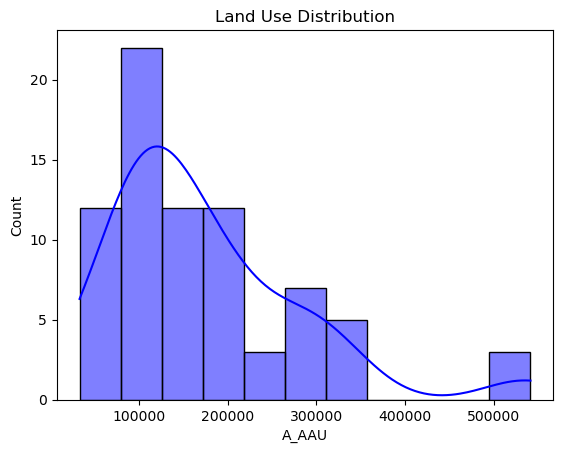

In [14]:
sns.histplot(ire_crops_df['A_AAU'], kde=True, color='blue', label='Ireland')
plt.title('Land Use Distribution')
plt.show()

In [15]:
gp_nldf = ire_crops_df.groupby('Year')[ire_num_col].sum().reset_index()

In [16]:
gp_nldf.head()

Year     N_AAU  N_Pasture    N_Hay  N_Grass_silage  N_Horticulture  \
0  2000  141527.0     117488  51699.0         99926.0         26720.0   
1  2010  139860.0     101253  27635.0         79777.0         16540.0   
2  2020  126473.0     103523  23929.0         86266.0         20678.0   

   N_Cereals  N_Rough_grazing  N_Grassland      A_AAU  A_Pastures     A_Hay  \
0    14760.0          34760.0       139318  4443071.0     2218147  242596.0   
1    11380.0          40560.0       136390  4568938.0     2507575  193790.0   
2     9394.0          30411.0       125286  4287399.8     2202107  133676.2   

   A_Grass_Silage  A_Horticulture  A_Cereals  A_Rough_Grazing  A_Grassland  
0       1074700.0        401124.0   279045.0         506504.0      4041947  
1       1076376.0        353927.0   273900.0         437275.0      4215016  
2       1165948.4         91285.5   265482.8         428903.8      3930632

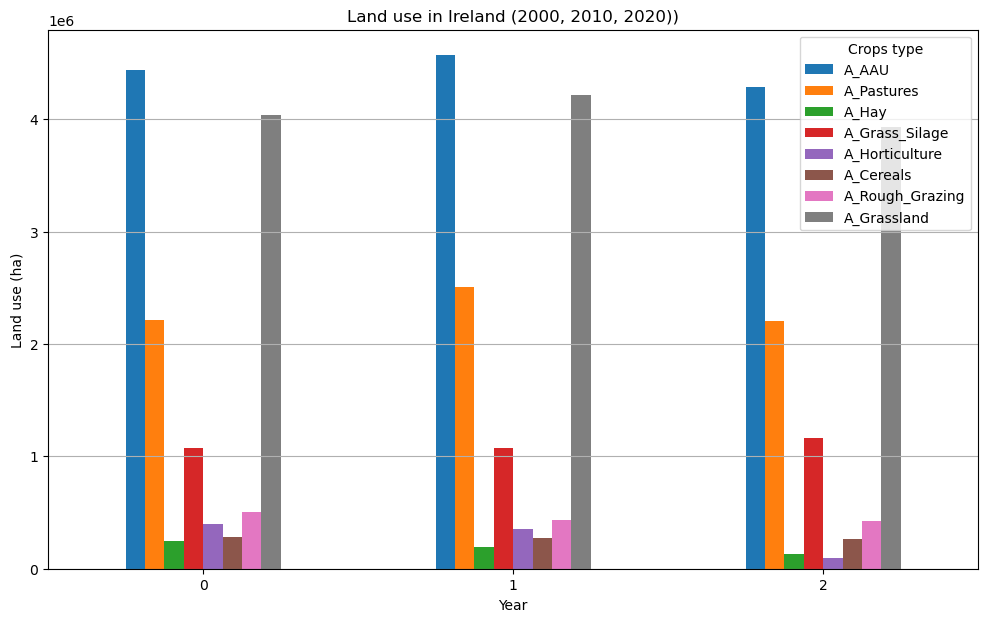

In [17]:
gp_nldf[a_ire_col].plot(kind='bar', figsize=(12, 7))
plt.title('Land use in Ireland (2000, 2010, 2020))')
plt.xlabel('Year')
plt.ylabel('Land use (ha)')
plt.xticks(rotation=0)
plt.legend(title='Crops type')
plt.grid(axis='y')
plt.show()

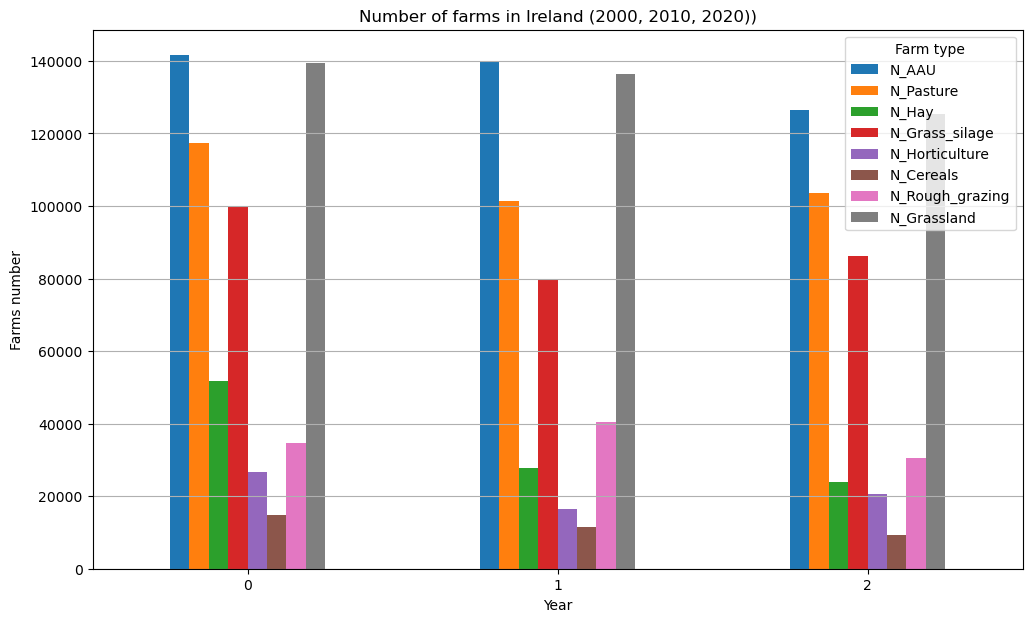

In [18]:
gp_nldf[n_ire_col].plot(kind='bar', figsize=(12, 7))
plt.title('Number of farms in Ireland (2000, 2010, 2020))')
plt.xlabel('Year')
plt.ylabel('Farms number')
plt.xticks(rotation=0)
plt.legend(title='Farm type')
plt.grid(axis='y')
plt.show()

In [19]:
yc_groupdf = ire_crops_df.groupby(['Year', 'County'])['A_AAU'].sum().reset_index()
top_5 = yc_groupdf.groupby('Year').apply(lambda x: x.nlargest(5, 'A_AAU')).reset_index(drop=True)

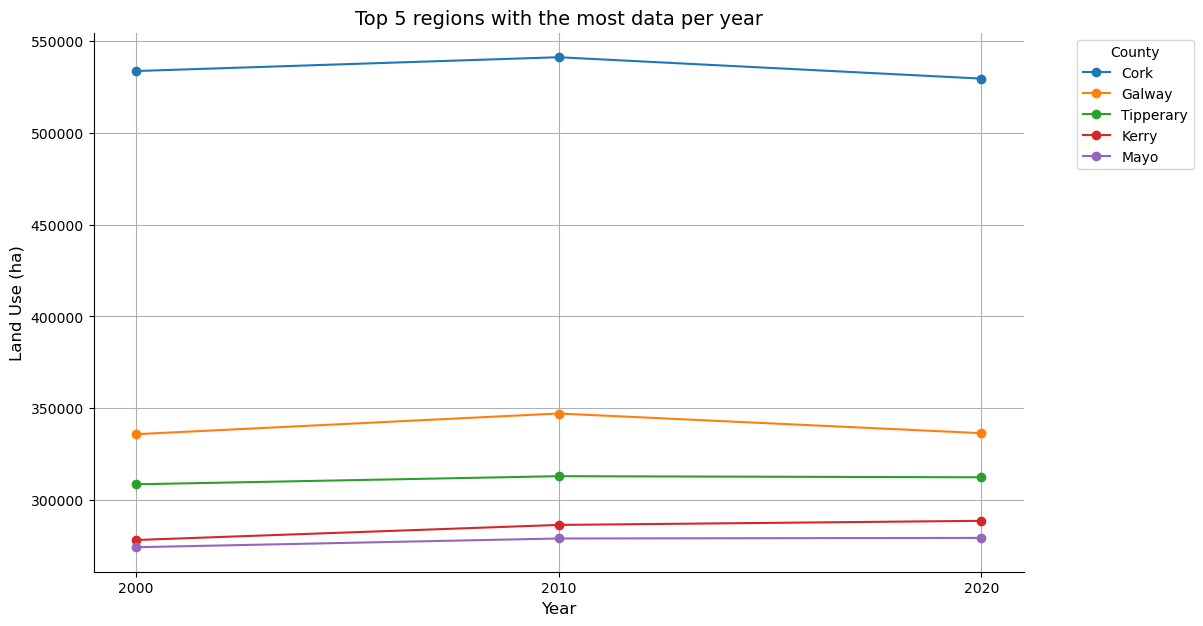

In [178]:
plt.figure(figsize=(12, 7))
for county in top_5['County'].unique():
    d_county = top_5[top_5['County'] == county]
    plt.plot(d_county['Year'], d_county['A_AAU'], label=county,marker='o', linestyle='-', linewidth=1.5)

plt.legend()
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 5 regions with the most data per year',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Land Use (ha)',fontsize=12)
plt.xticks(range(top_5['Year'].min(), top_5['Year'].max() + 1, 10))
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [21]:
top_5.head()

Year     County     A_AAU
0  2000       Cork  533785.0
1  2000     Galway  335833.0
2  2000  Tipperary  308527.0
3  2000      Kerry  278175.0
4  2000       Mayo  274238.0

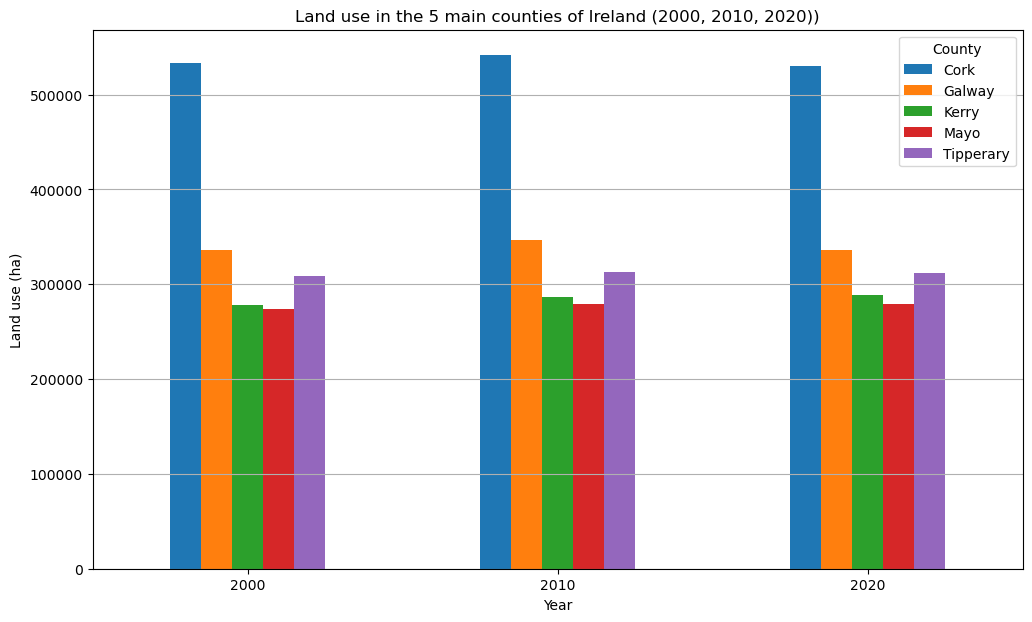

In [22]:
grouped = top_5.groupby(['Year', 'County'])['A_AAU'].sum().unstack()

grouped.plot(kind='bar', figsize=(12, 7))
plt.title('Land use in the 5 main counties of Ireland (2000, 2010, 2020))')
plt.xlabel('Year')
plt.ylabel('Land use (ha)')
plt.xticks(rotation=0)
plt.legend(title='County')
plt.grid(axis='y')
plt.show()

In [23]:
c_ire_crops=ire_crops_df.copy()

In [24]:
c_ire_crops['Land_Use_Change'] = c_ire_crops.groupby('County')['A_AAU'].pct_change() * 100
print(c_ire_crops[['Year', 'County', 'Land_Use_Change']].dropna())

    Year     County  Land_Use_Change
26  2010      Clare         1.412031
27  2010       Cork         1.410493
28  2010      Cavan         0.766372
29  2010     Carlow        -1.798946
30  2010    Donegal        11.808248
31  2010     Dublin         0.606880
32  2010     Galway         3.361790
33  2010    Kildare         1.108267
34  2010   Kilkenny         2.580018
35  2010      Kerry         2.952098
36  2010   Longford        -1.397701
37  2010      Louth        -1.668495
38  2010   Limerick         2.463127
39  2010    Leitrim         0.741170
40  2010      Laois         2.204153
41  2010      Meath         6.894073
42  2010   Monaghan         6.731870
43  2010       Mayo         1.735354
44  2010     Offaly         3.971143
45  2010  Roscommon         7.388344
46  2010      Sligo         4.625451
47  2010  Tipperary         1.434558
48  2010  Waterford         1.194889
49  2010    Wicklow        -0.335277
50  2010  Westmeath         7.003476
51  2010    Wexford        -1.351461
5

In [25]:
c_ire_crops.tail()

Year     County   N_AAU  N_Pasture   N_Hay  N_Grass_silage  \
71  2020  Tipperary  7404.0       6373  1561.0          5237.0   
72  2020  Waterford  2600.0       2143   437.0          1754.0   
73  2020    Wicklow  2456.0       2051   519.0          1396.0   
74  2020  Westmeath  3437.0       2915   690.0          2437.0   
75  2020    Wexford  4330.0       3388  1127.0          2740.0   

    N_Horticulture  N_Cereals  N_Rough_grazing  N_Grassland     A_AAU  \
71          1190.0      670.0           1034.0         7328  312355.8   
72           485.0      245.0            475.0         2580  122230.8   
73           601.0      349.0            622.0         2417  103225.1   
74           735.0      195.0            586.0         3422  130918.2   
75          1752.0     1656.0            523.0         4142  181200.8   

    A_Pastures   A_Hay  A_Grass_Silage  A_Horticulture  A_Cereals  \
71      177604  9589.3         91316.7          5027.6    19632.1   
72       67425  2770.7         36328.6          2798.3     6463.3   
73       53511  3937.3         22749.7          3235.6    10726.5   
74       75817  4670.5         37475.0          2635.9     4538.5   
75       73313  7599.6         42534.2         12008.0    42660.1   

    A_Rough_Grazing  A_Grassland  Land_Use_Change  
71           9186.2       287696        -0.190827  
72           6445.4       112969        -2.875033  
73           9065.5        89263         1.834047  
74           5781.0       123744         1.984249  
75           3086.0       126533        -0.703729

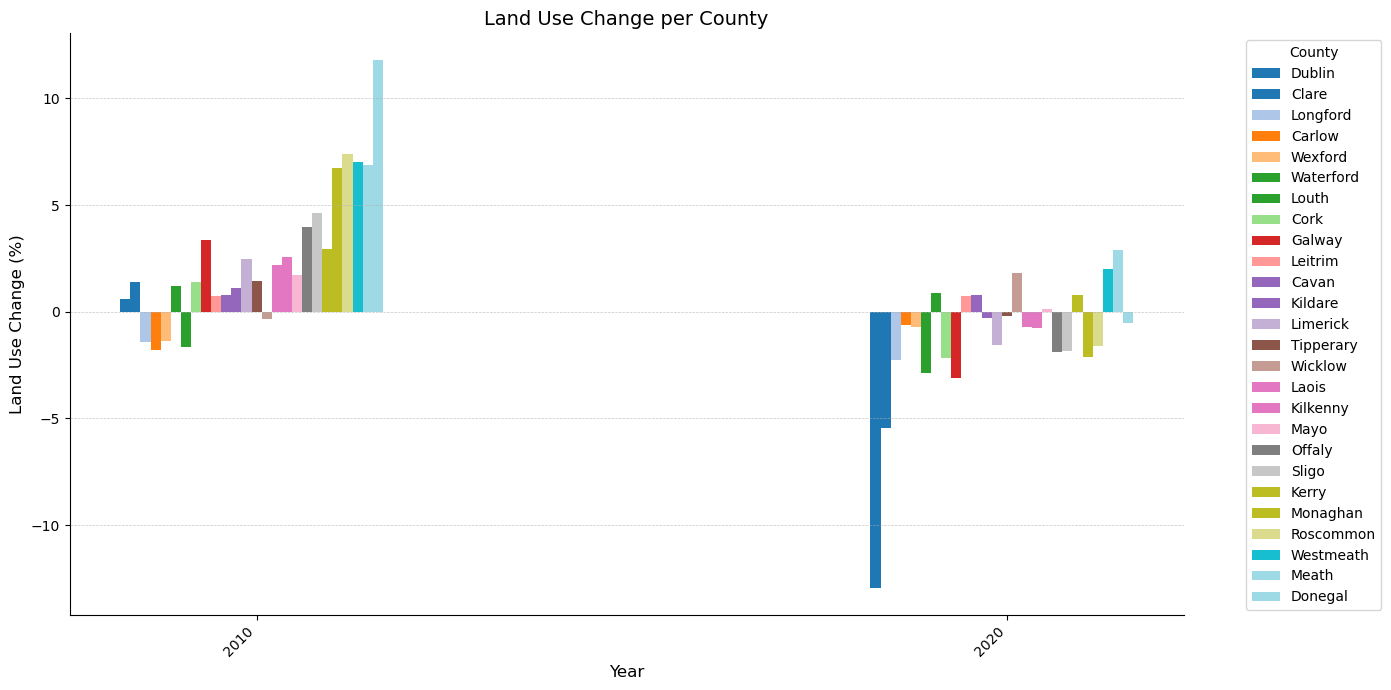

In [182]:
data = c_ire_crops[['Year', 'County', 'Land_Use_Change']].dropna()

counties = data.groupby('County')['Land_Use_Change'].sum().sort_values().index
years = data['Year'].unique()

x = np.arange(len(years))
bar_width = 0.35

plt.figure(figsize=(14, 7))

colors = plt.cm.tab20(np.linspace(0, 1, len(counties)))

for i, county in enumerate(counties):
    plt.bar(x - bar_width/2 + i*(bar_width/len(counties)), 
            data[data['County'] == county]['Land_Use_Change'], 
            width=bar_width/len(counties), 
            label=county,
            color=colors[i])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Land Use Change (%)', fontsize=12)
plt.title('Land Use Change per County', fontsize=14)

plt.xticks(x, years, rotation=45, ha='right')

plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

In [27]:
c_ire_crops['avg_Pastures'] = (c_ire_crops['A_Pastures'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Hay'] = (c_ire_crops['A_Hay'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Grass_Silage'] = (c_ire_crops['A_Grass_Silage'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Horticulture'] = (c_ire_crops['A_Horticulture'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Cereals'] = (c_ire_crops['A_Cereals'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Rough_Grazing'] = (c_ire_crops['A_Rough_Grazing'] / c_ire_crops['A_AAU']) * 100
c_ire_crops['avg_Grassland'] = (c_ire_crops['A_Grassland'] / c_ire_crops['A_AAU']) * 100

In [28]:
avg_ire_crops = ['avg_Pastures','avg_Hay','avg_Grass_Silage', 'avg_Horticulture',
                'avg_Cereals','avg_Rough_Grazing','avg_Grassland']

In [29]:
avg_iregroup = c_ire_crops.groupby(['Year', 'County'])[avg_ire_crops].mean().reset_index()

In [30]:
avg_iregroup.head()

Year   County  avg_Pastures   avg_Hay  avg_Grass_Silage  avg_Horticulture  \
0  2000   Carlow     42.874421  6.093339         18.580306         27.340090   
1  2000    Cavan     55.360267  5.261217         31.925185          1.556603   
2  2000    Clare     52.055569  7.603206         25.408002          0.997734   
3  2000     Cork     45.630544  3.561921         27.603248         12.521521   
4  2000  Donegal     38.999610  4.028880         14.650709          4.451238   

   avg_Cereals  avg_Rough_Grazing  avg_Grassland  
0    19.032128           5.111843      72.659910  
1     0.555258           5.896728      98.443397  
2     0.114502          13.935489      99.002266  
3     8.076660          10.682766      87.478479  
4     3.037596          37.869563      95.548762

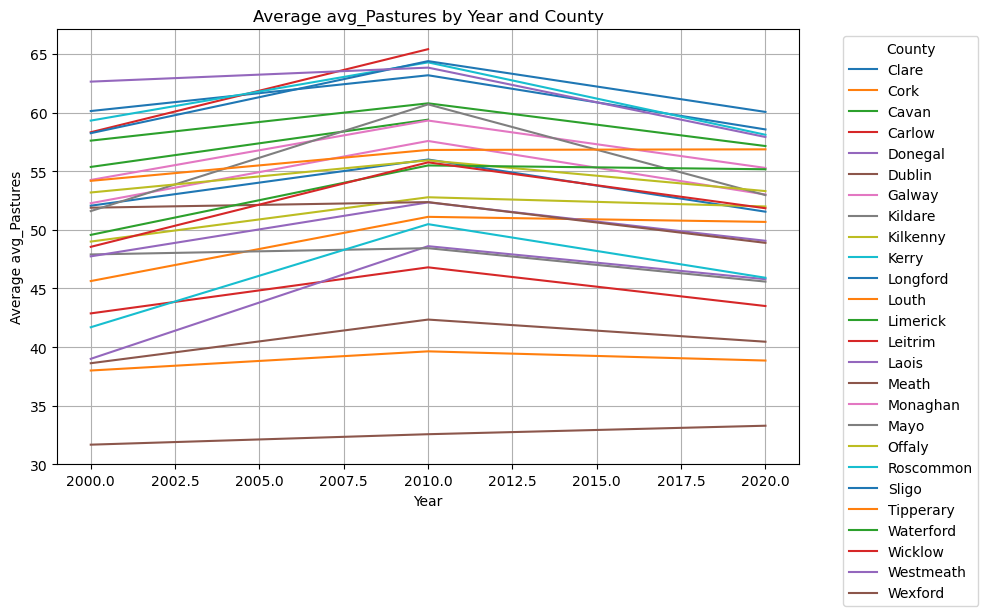

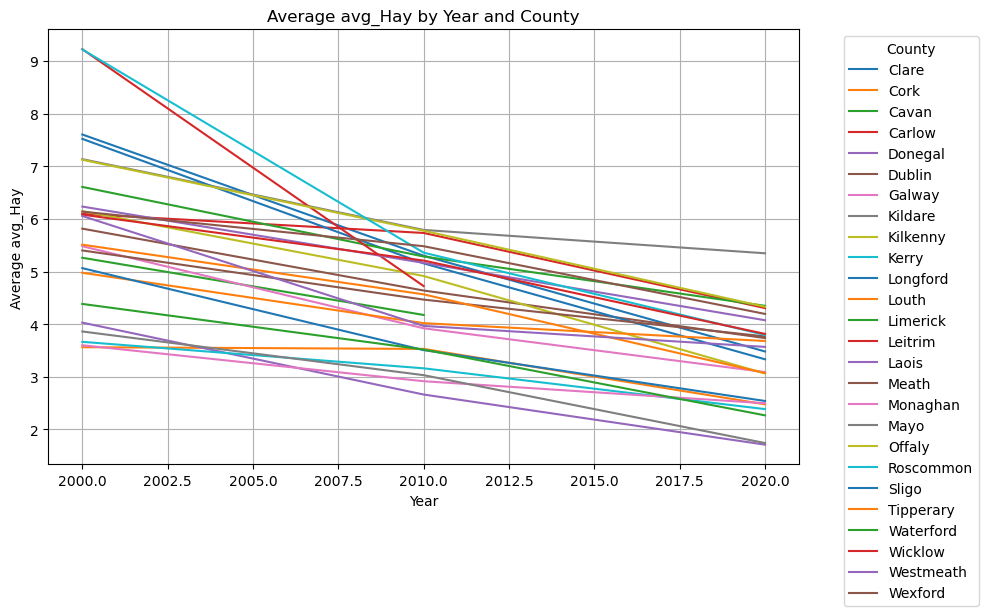

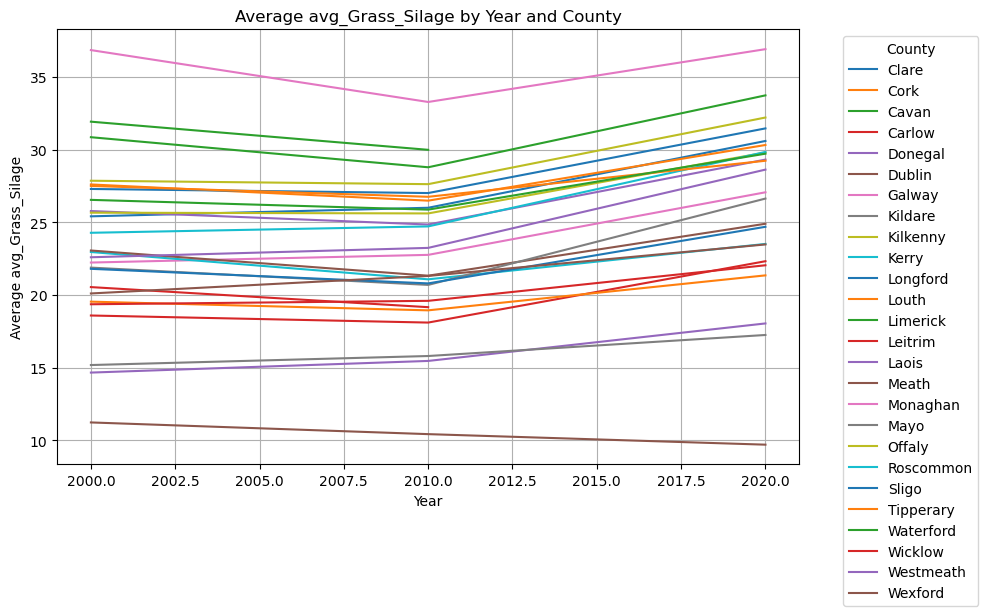

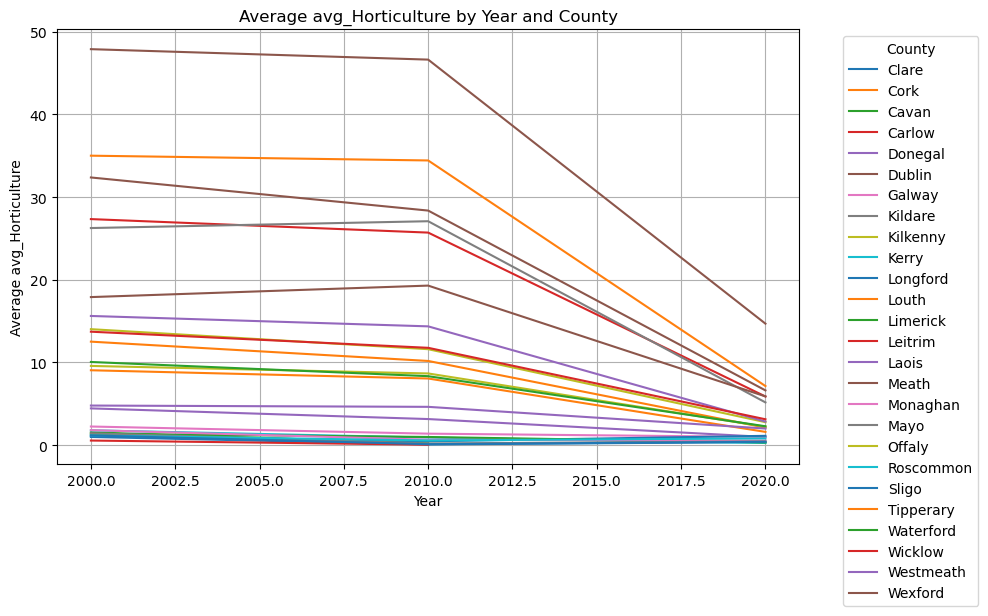

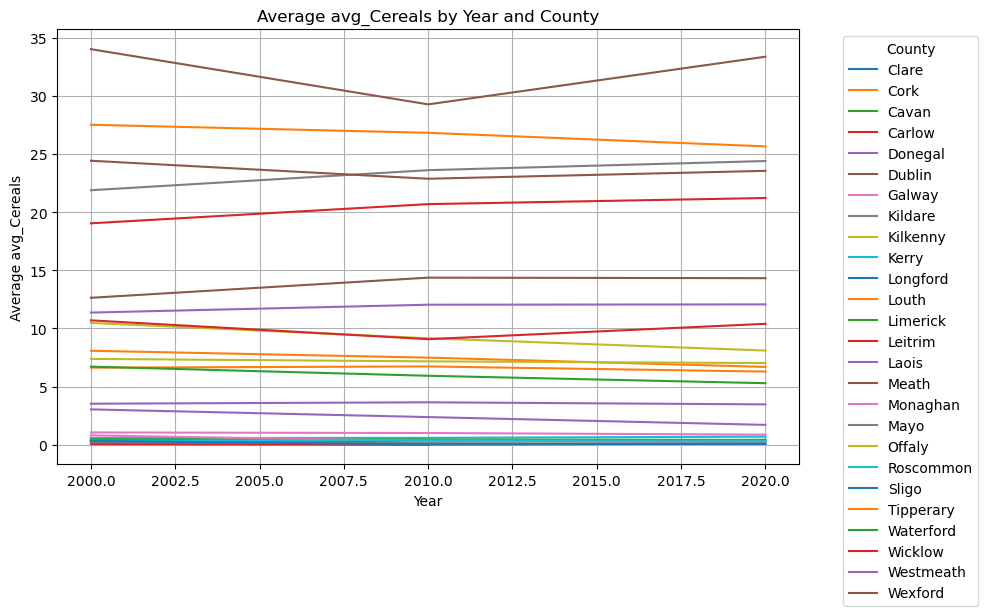

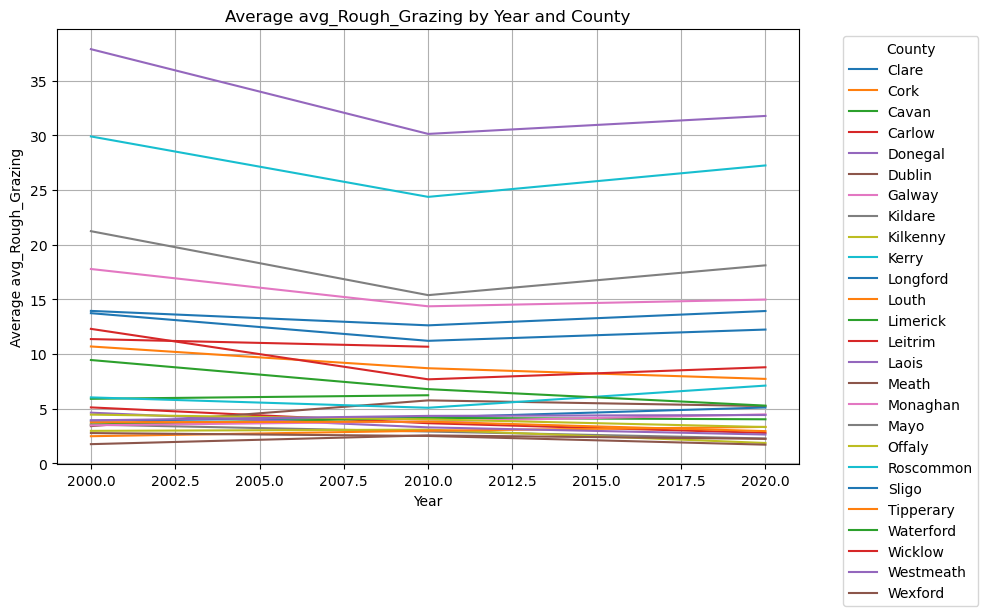

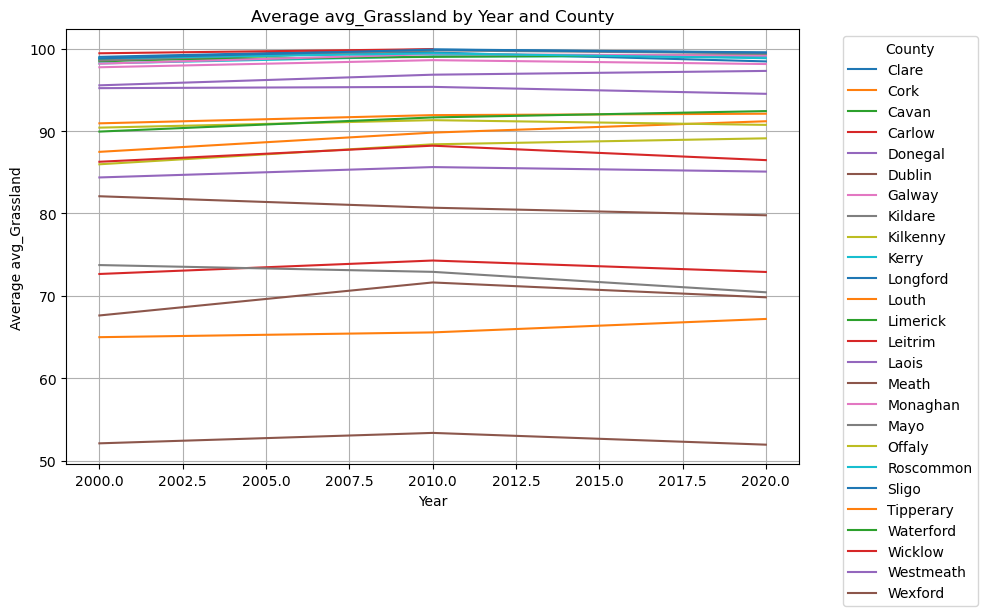

In [31]:
for column in avg_ire_crops:
    plt.figure(figsize=(10, 6))
    
    for region in c_ire_crops['County'].unique():
        region_data = c_ire_crops[c_ire_crops['County'] == region]
        plt.plot(region_data['Year'], region_data[column], label=region)
    
    
    plt.xlabel('Year')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by Year and County')
    plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
  
    plt.show()

In [32]:
# ratio of hectare use for number of farms 
c_ire_crops['AN_AAU'] = (c_ire_crops['A_AAU'] / c_ire_crops['N_AAU'])
c_ire_crops['AN_Pastures'] = (c_ire_crops['A_Pastures'] / c_ire_crops['N_Pasture'])
c_ire_crops['AN_Hay'] = (c_ire_crops['A_Hay'] / c_ire_crops['N_Hay'])
c_ire_crops['AN_Grass_Silage'] = (c_ire_crops['A_Grass_Silage'] / c_ire_crops['N_Grass_silage'])
c_ire_crops['AN_Horticulture'] = (c_ire_crops['A_Horticulture'] / c_ire_crops['N_Horticulture'])
c_ire_crops['AN_Cereals'] = (c_ire_crops['A_Cereals'] / c_ire_crops['N_Cereals'])
c_ire_crops['AN_Rough_Grazing'] = (c_ire_crops['A_Rough_Grazing'] / c_ire_crops['N_Rough_grazing'])
c_ire_crops['AN_Grassland'] = (c_ire_crops['A_Grassland'] / c_ire_crops['N_Grassland'])

In [33]:
na_ire_col = ['AN_AAU','AN_Pastures','AN_Hay','AN_Grass_Silage', 'AN_Horticulture','AN_Cereals',
              'AN_Rough_Grazing', 'AN_Grassland']

In [34]:
na_ire_group = c_ire_crops.groupby(['Year', 'County']).sum().reset_index()

In [35]:
na_ire_group.head()

Year   County    N_AAU  N_Pasture   N_Hay  N_Grass_silage  N_Horticulture  \
0  2000   Carlow   1882.0       1545   793.0          1121.0           940.0   
1  2000    Cavan   5492.0       4699  1712.0          4421.0           300.0   
2  2000    Clare   6722.0       5452  3065.0          5183.0           490.0   
3  2000     Cork  14231.0      11929  4346.0         11295.0          4520.0   
4  2000  Donegal   8801.0       6257  2482.0          4821.0          1330.0   

   N_Cereals  N_Rough_grazing  N_Grassland  ...  avg_Rough_Grazing  \
0      680.0            430.0         1802  ...           5.111843   
1       40.0           1080.0         5463  ...           5.896728   
2       30.0           2030.0         6700  ...          13.935489   
3     2570.0           4120.0        13882  ...          10.682766   
4      730.0           4570.0         8734  ...          37.869563   

   avg_Grassland     AN_AAU  AN_Pastures    AN_Hay  AN_Grass_Silage  \
0      72.659910  38.220510    19.961165  5.527112        11.922391   
1      98.443397  25.184632    16.295169  4.250584         9.988012   
2      99.002266  31.311663    20.096295  5.221207        10.317963   
3      87.478479  37.508608    20.418224  4.374827        13.044887   
4      95.548762  26.202704    14.373821  3.743352         7.008090   

   AN_Horticulture  AN_Cereals  AN_Rough_Grazing  AN_Grassland  
0        20.921277   20.132353          8.551163     29.003885  
1         7.176667   19.200000          7.551852     24.924217  
2         4.285714    8.033333         14.448768     31.101045  
3        14.787168   16.775097         13.840534     33.636868  
4         7.718045    9.595890         19.109628     25.228418  

[5 rows x 34 columns]

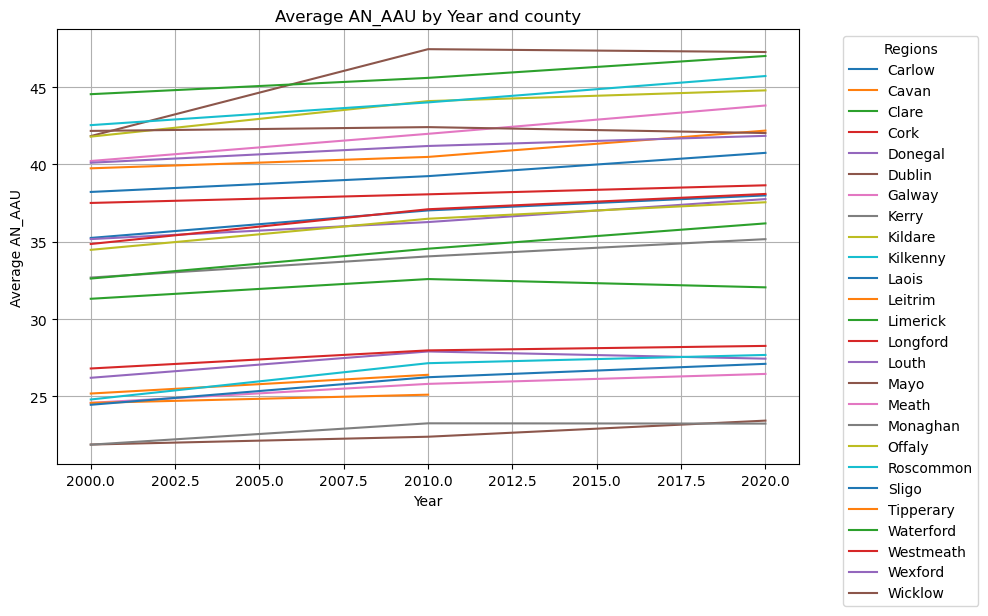

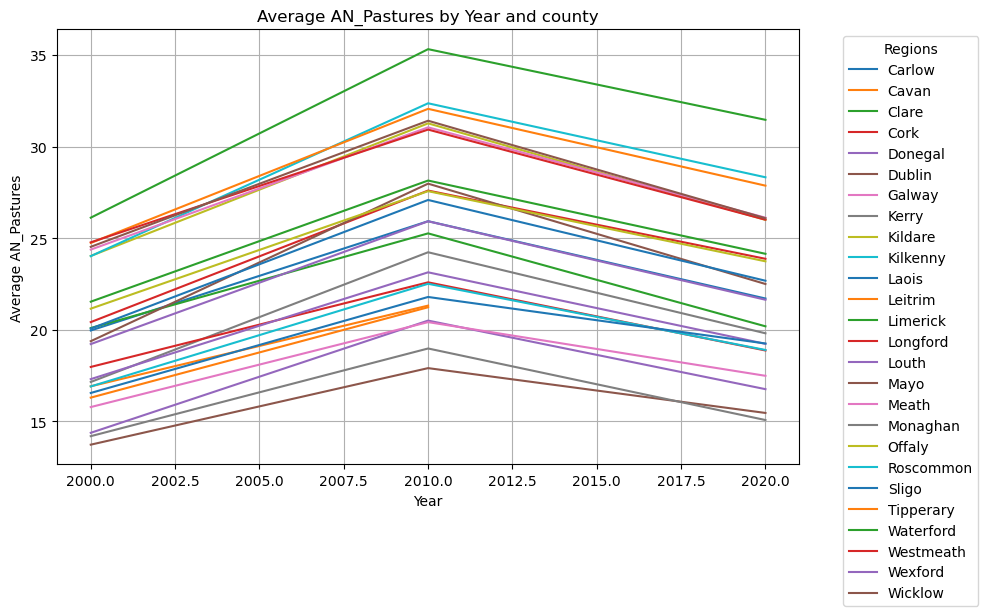

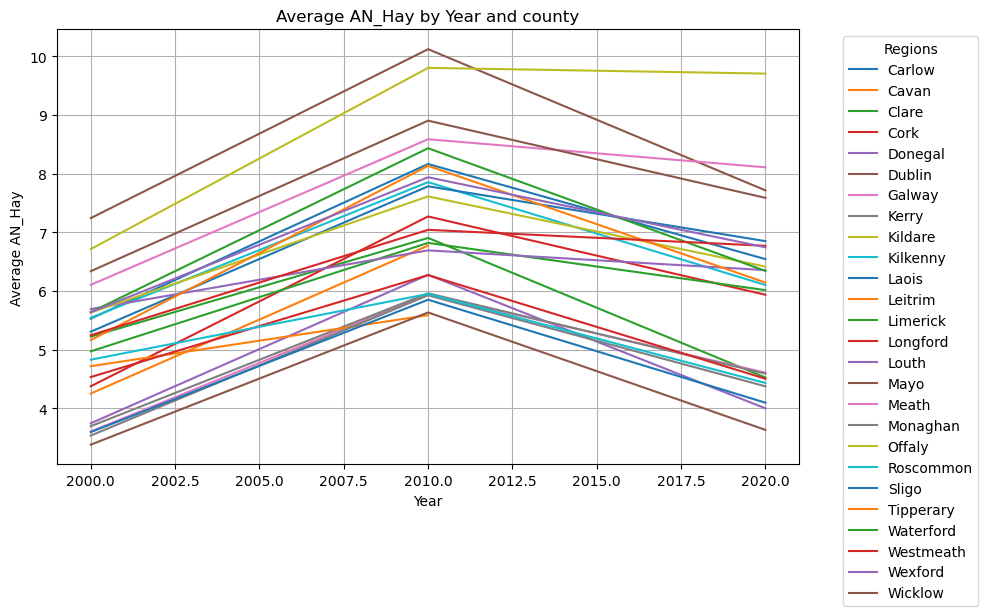

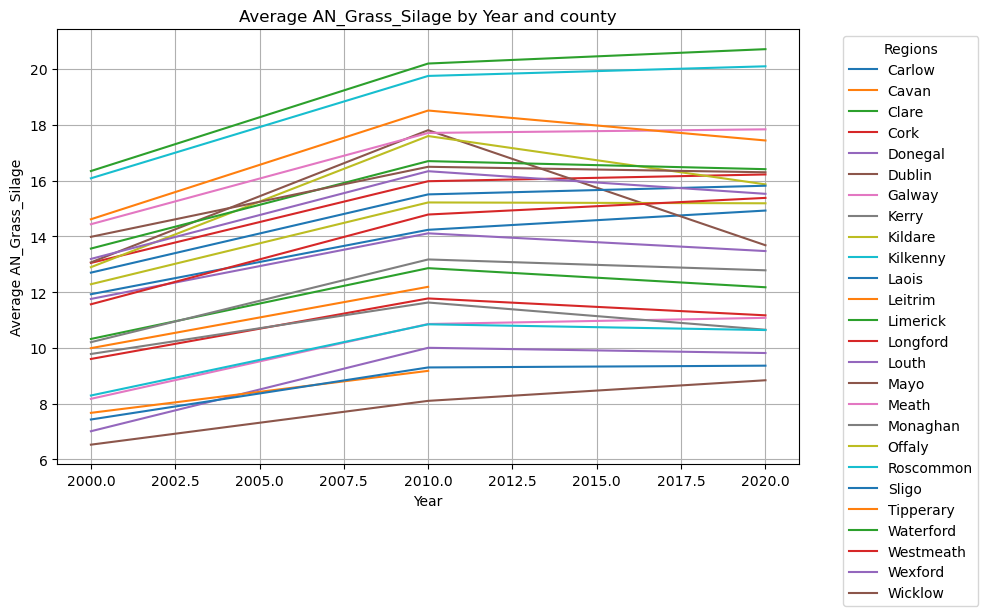

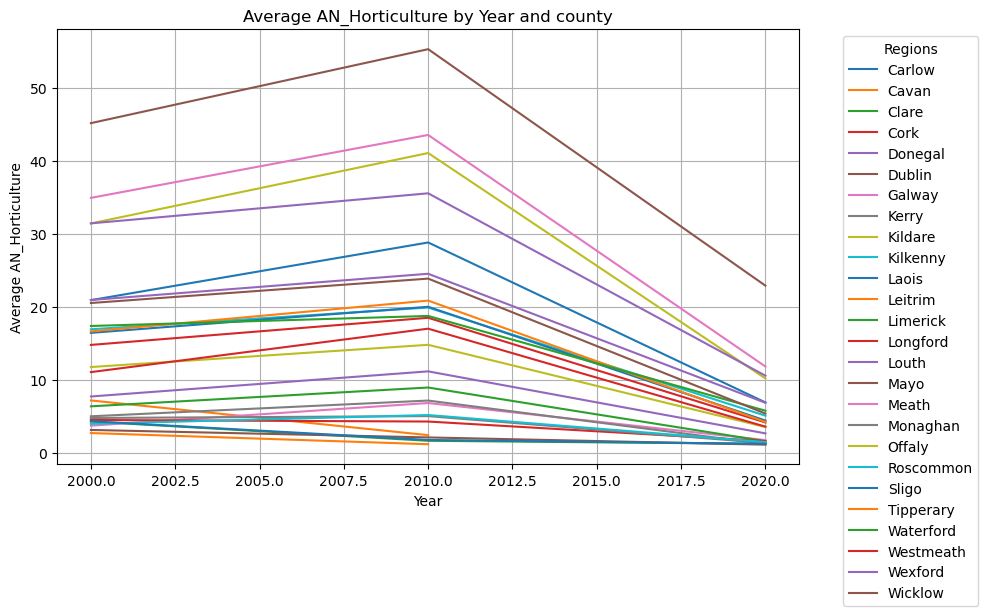

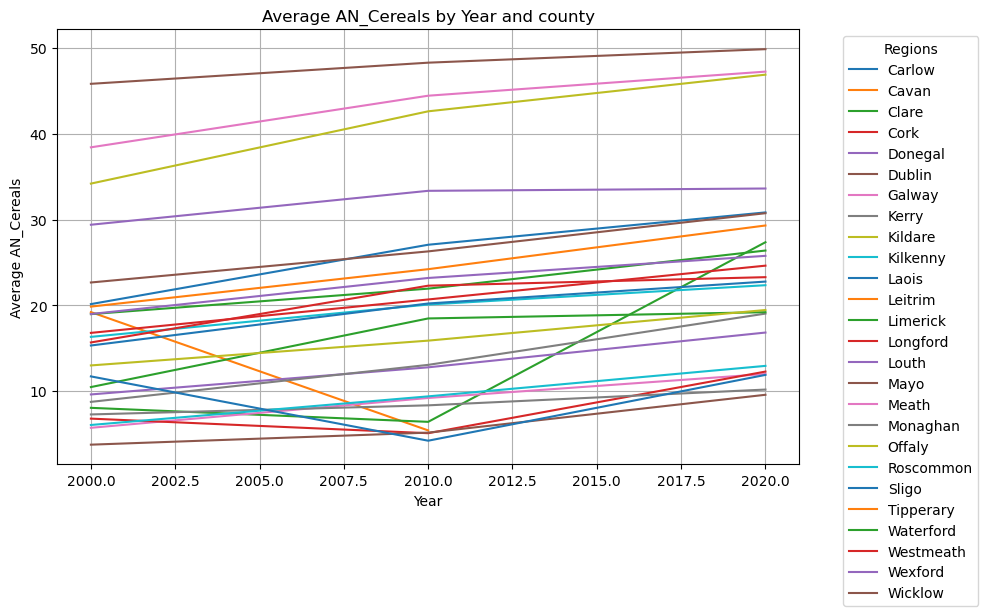

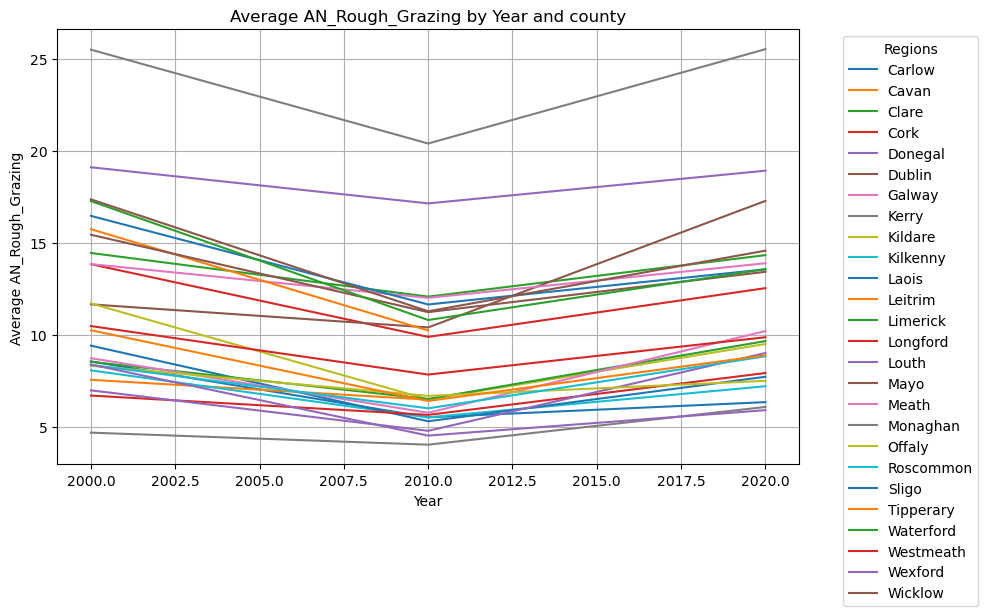

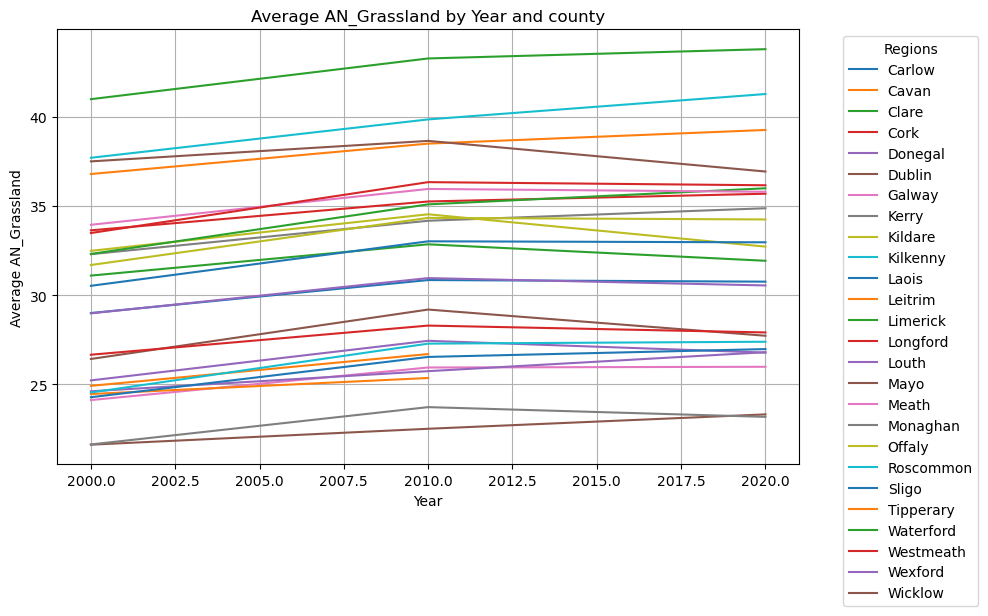

In [36]:
for column in na_ire_col:
    plt.figure(figsize=(10, 6))
    
    for county in na_ire_group['County'].unique():
        region_data = na_ire_group[na_ire_group['County'] == county]
        plt.plot(region_data['Year'], region_data[column], label=county)
    
    plt.xlabel('Year')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by Year and county')
    plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

In [37]:
na_group_ire = na_ire_group.copy()
na_group_ire= na_group_ire.drop(['County' ], axis=1)

In [38]:
na_group_ire = na_group_ire.groupby('Year').sum().reset_index()
na_group_ire.head()

Year     N_AAU  N_Pasture    N_Hay  N_Grass_silage  N_Horticulture  \
0  2000  141527.0     117488  51699.0         99926.0         26720.0   
1  2010  139860.0     101253  27635.0         79777.0         16540.0   
2  2020  126473.0     103523  23929.0         86266.0         20678.0   

   N_Cereals  N_Rough_grazing  N_Grassland      A_AAU  ...  avg_Rough_Grazing  \
0    14760.0          34760.0       139318  4443071.0  ...         239.809418   
1    11380.0          40560.0       136390  4568938.0  ...         204.181250   
2     9394.0          30411.0       125286  4287399.8  ...         193.405310   

   avg_Grassland      AN_AAU  AN_Pastures      AN_Hay  AN_Grass_Silage  \
0    2304.036127  865.424595   511.569792  130.211253       296.391422   
1    2331.931969  904.844983   674.522948  188.207117       370.786036   
2    2122.436803  872.478695   533.177182  142.065308       341.328804   

   AN_Horticulture  AN_Cereals  AN_Rough_Grazing  AN_Grassland  
0       368.049667  426.642628        307.355530    771.028353  
1       440.307761         NaN        224.514936    822.425299  
2       120.625100  584.205660        272.214245    769.059237  

[3 rows x 33 columns]

## 2.2. Descriptive Statistics Netherland 

In [39]:
nl_crops_df.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0    PV20  2000  332202.56   8312      188329.62   85094.60           4214   
1    PV20  2010  323618.52   6618      170457.72   86863.34           3102   
2    PV20  2020  322719.77   4948      168464.28   70730.10           2728   
3    PV21  2000  462071.72  14104       46941.64   13663.22           1962   
4    PV21  2010  458140.70  11380       44902.86   18881.20           1480   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0       3572           2192.26               524           14838.32   
1       2760           1696.94               324           12243.10   
2       2338           2089.84               338           11851.70   
3       1306           2546.08               444           13920.04   
4       1094           2006.16               250           27760.86   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  
0       141532.30            6292        5390  
1       151341.42            5408        4356  
2       152047.14            4168        2940  
3       412444.80           13210       12412  
4       410954.08           10802       10190

In [40]:
crops_nl = len(nl_crops_df)
print(crops_nl)

36


In [41]:
mean_UAA = nl_crops_df['A_UAA'].mean()
median_UAA = nl_crops_df['A_UAA'].median()
mode_UAA = nl_crops_df['A_UAA'].mode().iloc[0]
std_UAA = nl_crops_df['A_UAA'].std()
UAA_range = (nl_crops_df['A_UAA'].min(), nl_crops_df['A_UAA'].max())
missing_UAA_percentage = nl_crops_df['A_UAA'].isnull().mean() * 100

# Display Descriptive Statistics
print("Utilized Land Area Count:", crops_nl)
print("Mean Utilized Land Area:", mean_UAA)
print("Median Utilized Land Area:", median_UAA)
print("Meode Utilized Land Area:", mode_UAA)
print("Standard Deviation of Utilized Land Area:", std_UAA)
print("Utilized Land Area Range:", UAA_range)
print("Percentage of Missing Utilized Land Area Values:", missing_UAA_percentage)

Utilized Land Area Count: 36
Mean Utilized Land Area: 314570.8072222222
Median Utilized Land Area: 293835.62
Meode Utilized Land Area: 133285.74
Standard Deviation of Utilized Land Area: 119909.80299034413
Utilized Land Area Range: (133285.74, 540386.9)
Percentage of Missing Utilized Land Area Values: 0.0


In [42]:
mean_NUAA = nl_crops_df['N_UAA'].mean()
median_NUAA = nl_crops_df['N_UAA'].median()
std_NUAA = nl_crops_df['N_UAA'].std()
NUAA_range = (nl_crops_df['N_UAA'].min(), nl_crops_df['N_UAA'].max())
missing_NUAA_percentage = nl_crops_df['N_UAA'].isnull().mean() * 100
# Display Descriptive Statistics
print("Utilized Land Farms Count:", crops_nl)
print("Mean Utilized Land Farms:", mean_NUAA)
print("Median Utilized Land Farms:", median_NUAA)
print("Standard Deviation of Utilized Land Farms:", std_NUAA)
print("Utilized Land Farms Range:", NUAA_range)
print("Percentage of Missing Utilized Land Farms Values:", missing_NUAA_percentage)

Utilized Land Farms Count: 36
Mean Utilized Land Farms: 12102.944444444445
Median Utilized Land Farms: 9145.0
Standard Deviation of Utilized Land Farms: 7920.123685702477
Utilized Land Farms Range: (3252, 33642)
Percentage of Missing Utilized Land Farms Values: 0.0


In [43]:
Regions_counts = nl_crops_df['Regions'].value_counts()
Regions_percentages = (Regions_counts / crops_nl) * 100

print("Regions Counts:\n", Regions_counts)
print("Regions Percentages:\n", Regions_percentages)

Regions Counts:
 Regions
PV20    3
PV21    3
PV22    3
PV23    3
PV24    3
PV25    3
PV26    3
PV27    3
PV28    3
PV29    3
PV30    3
PV31    3
Name: count, dtype: int64
Regions Percentages:
 Regions
PV20    8.333333
PV21    8.333333
PV22    8.333333
PV23    8.333333
PV24    8.333333
PV25    8.333333
PV26    8.333333
PV27    8.333333
PV28    8.333333
PV29    8.333333
PV30    8.333333
PV31    8.333333
Name: count, dtype: float64


In [44]:
year_counts = nl_crops_df['Year'].value_counts()
year_percentages = (year_counts / crops_nl) * 100

print("Years Counts:\n", year_counts)
print("Years Percentages:\n", year_percentages)

Years Counts:
 Year
2000    12
2010    12
2020    12
Name: count, dtype: int64
Years Percentages:
 Year
2000    33.333333
2010    33.333333
2020    33.333333
Name: count, dtype: float64


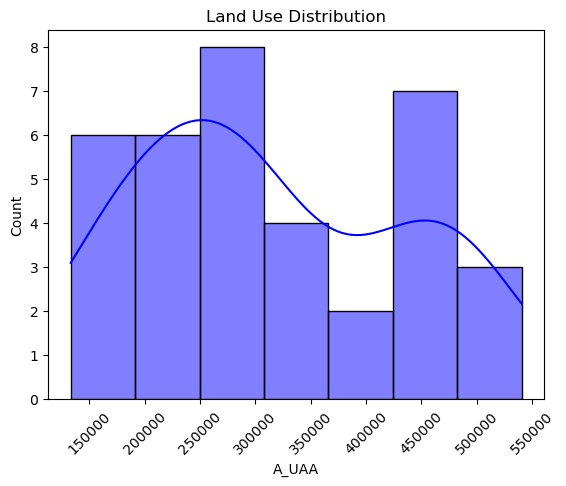

In [45]:
sns.histplot(nl_crops_df['A_UAA'], kde=True, color='blue', label='Ireland')
plt.title('Land Use Distribution')
plt.xticks(rotation=45)
plt.show()

In [46]:
gp_nldf = nl_crops_df.groupby('Year')[nl_num_col].sum().reset_index()

In [47]:
gp_nldf.head()

Year       A_UAA   N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0  2000  3951008.55  191888     1268879.34  451495.34          71744   
1  2010  3744638.81  141254     1084141.60  437527.06          41928   
2  2020  3628901.70  102564     1053686.46  347091.92          37338   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0      45330         162121.58             33176         2104176.22   
1      29984         174145.94             22074         2061498.82   
2      23974         186255.50             19036         2015578.26   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  
0      2498965.86          144170      120336  
1      2465736.28          112544       91716  
2      2368803.94           85124       62168

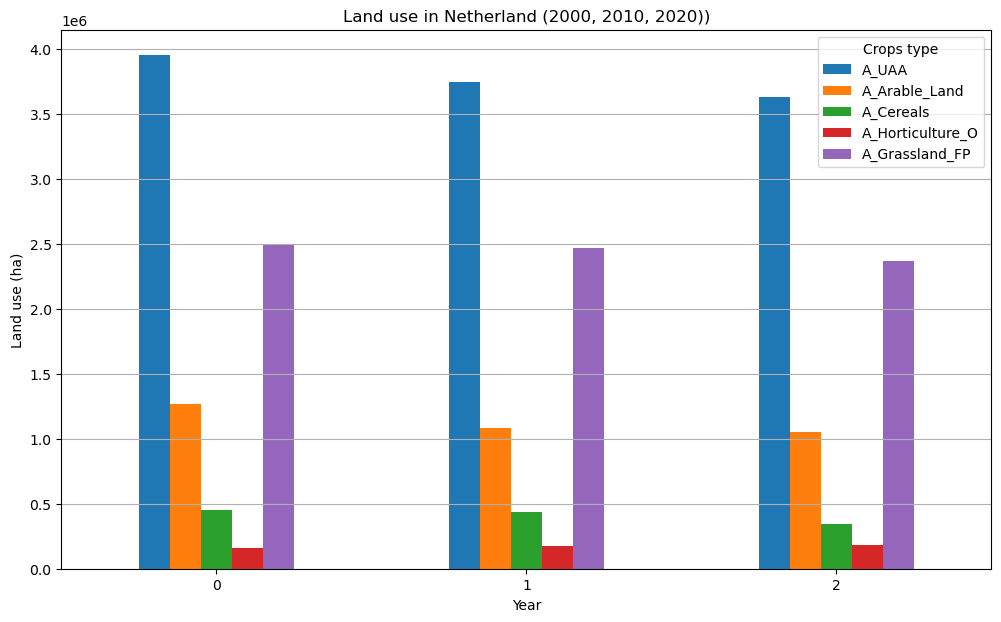

In [48]:
gp_nldf[a_nl_col].plot(kind='bar', figsize=(12, 7))
plt.title('Land use in Netherland (2000, 2010, 2020))')
plt.xlabel('Year')
plt.ylabel('Land use (ha)')
plt.xticks(rotation=0)
plt.legend(title='Crops type')
plt.grid(axis='y')
plt.show()

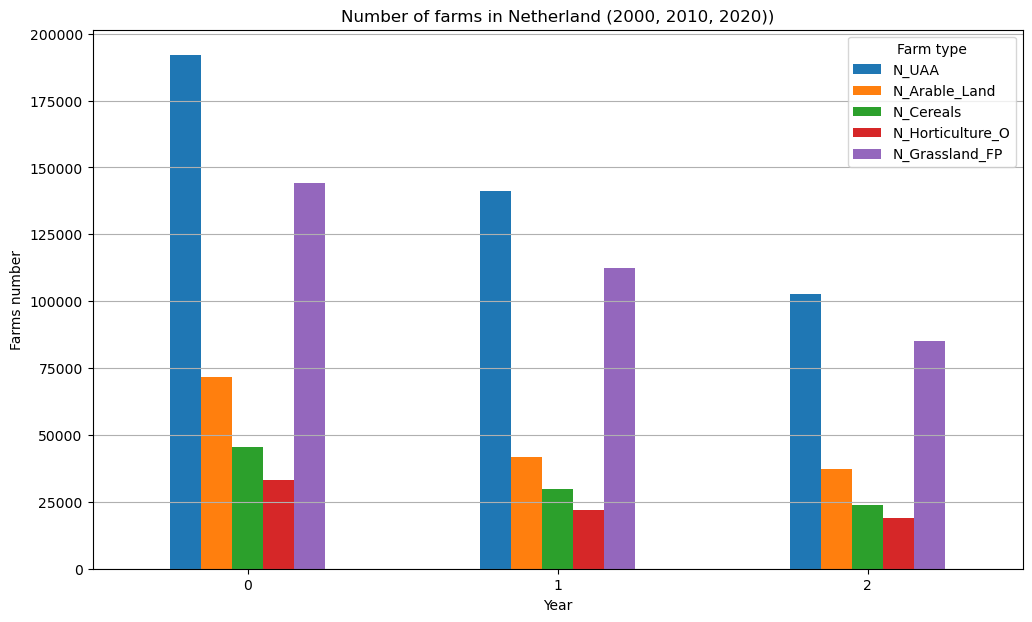

In [49]:
gp_nldf[n_nl_col].plot(kind='bar', figsize=(12, 7))
plt.title('Number of farms in Netherland (2000, 2010, 2020))')
plt.xlabel('Year')
plt.ylabel('Farms number')
plt.xticks(rotation=0)
plt.legend(title='Farm type')
plt.grid(axis='y')
plt.show()

In [50]:
yr_groupdf = nl_crops_df.groupby(['Year', 'Regions'])['A_UAA'].sum().reset_index()
top_nl_5 = yr_groupdf.groupby('Year').apply(lambda x: x.nlargest(5, 'A_UAA')).reset_index(drop=True)

In [51]:
yr_groupdf.head()

Year Regions      A_UAA
0  2000    PV20  332202.56
1  2000    PV21  462071.72
2  2000    PV22  318528.04
3  2000    PV23  436719.82
4  2000    PV24  183272.35

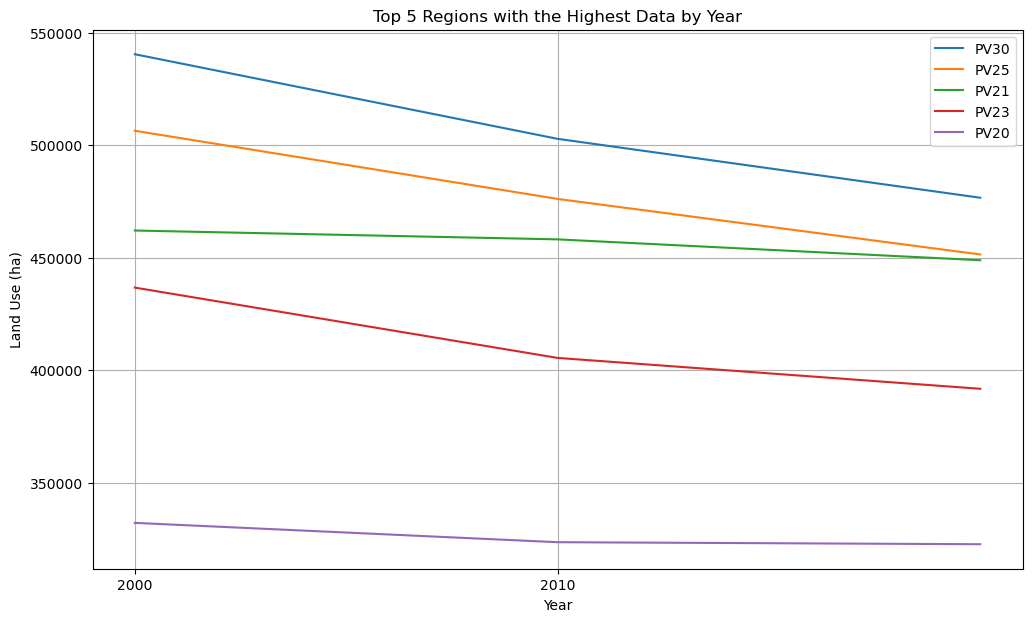

In [52]:
plt.figure(figsize=(12, 7))
for region in top_nl_5['Regions'].unique():
    d_region = top_nl_5[top_nl_5['Regions'] == region]
    plt.plot(d_region['Year'], d_region['A_UAA'], label=region)

plt.legend()
plt.title('Top 5 Regions with the Highest Data by Year')
plt.xlabel('Year')
plt.ylabel('Land Use (ha)')
plt.xticks(range(top_nl_5['Year'].min(), top_nl_5['Year'].max(), 10)) 
plt.grid(True)
plt.show()

In [53]:
c_nl_crops=nl_crops_df.copy()

In [54]:
c_nl_crops['Land_Use_Change'] = c_nl_crops.groupby('Regions')['A_UAA'].pct_change() * 100
print(c_nl_crops[['Year', 'Regions', 'Land_Use_Change']].dropna())

    Year Regions  Land_Use_Change
1   2010    PV20        -2.583978
2   2020    PV20        -0.277719
4   2010    PV21        -0.850738
5   2020    PV21        -2.021916
7   2010    PV22        -5.612900
8   2020    PV22        -1.321021
10  2010    PV23        -7.151981
11  2020    PV23        -3.382104
13  2010    PV24        -2.543422
14  2020    PV24         0.121835
16  2010    PV25        -5.977955
17  2020    PV25        -5.185134
19  2010    PV26        -4.573509
20  2020    PV26         5.351848
22  2010    PV27        -4.350052
23  2020    PV27        -2.533071
25  2010    PV28        -7.792050
26  2020    PV28       -12.830639
28  2010    PV29        -5.542932
29  2020    PV29         1.330020
31  2010    PV30        -6.954160
32  2020    PV30        -5.205642
34  2010    PV31        -8.009403
35  2020    PV31        -3.229750


In [55]:
c_nl_crops.tail()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
31    PV30  2010  502807.53  24904      139934.38   51864.06           9230   
32    PV30  2020  476633.17  17950      147042.56   43846.54           8758   
33    PV31  2000  217626.22  13412       93819.20   37415.96           8614   
34    PV31  2010  200195.66   9478       76464.88   35256.98           4914   
35    PV31  2020  193729.84   6986       76109.86   29727.98           4050   

    N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
31       5074          37022.38              5054          290159.30   
32       4124          36267.66              4246          286502.00   
33       5384          19638.02              4190          161260.06   
34       3496          22937.38              2802          185407.86   
35       2778          24760.14              2690          180024.60   

    A_Grassland_FP  N_Grassland_FP  Grazing_LS  Land_Use_Change  
31       322949.18           20458       14500        -6.954160  
32       290457.94           15362        9340        -5.205642  
33       102556.40            9368        6568              NaN  
34        98939.32            7138        4494        -8.009403  
35        91059.58            5488        2946        -3.229750

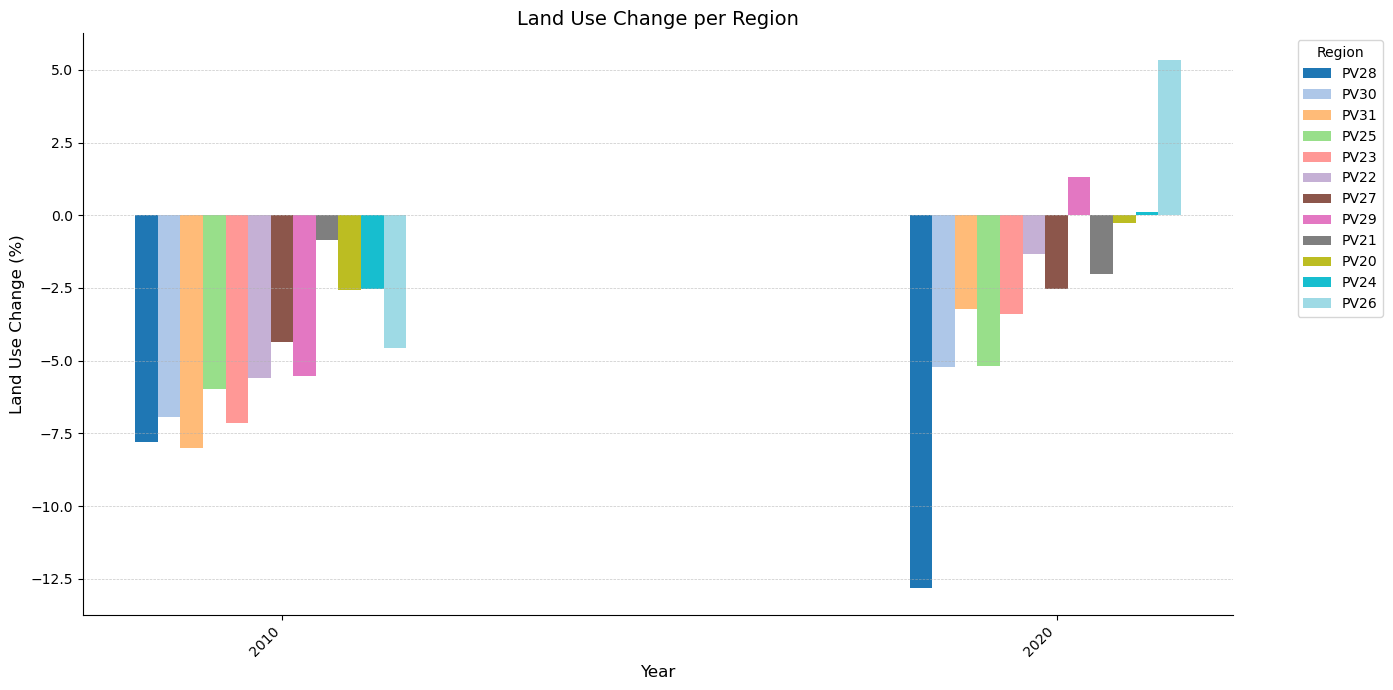

In [185]:
data = c_nl_crops[['Year', 'Regions', 'Land_Use_Change']].dropna()

region = data.groupby('Regions')['Land_Use_Change'].sum().sort_values().index
years = data['Year'].unique()

x = np.arange(len(years))
bar_width = 0.35

plt.figure(figsize=(14, 7))

colors = plt.cm.tab20(np.linspace(0, 1, len(region)))

for i, reg in enumerate(region):
    plt.bar(x - bar_width/2 + i*(bar_width/len(region)), 
            data[data['Regions'] == reg]['Land_Use_Change'], 
            width=bar_width/len(region), 
            label=reg,
            color=colors[i])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Land Use Change (%)', fontsize=12)
plt.title('Land Use Change per Region', fontsize=14)

plt.xticks(x, years, rotation=45, ha='right')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

In [57]:
#Average Land use by crop

In [58]:
c_nl_crops['avg_ArableLand'] = (c_nl_crops['A_Arable_Land'] / c_nl_crops['A_UAA']) * 100
c_nl_crops['avg_cereals'] = (c_nl_crops['A_Cereals'] / c_nl_crops['A_Arable_Land']) * 100
c_nl_crops['avg_Horticulture'] = (c_nl_crops['A_Horticulture_O'] / c_nl_crops['A_UAA']) * 100
c_nl_crops['avg_Grassland'] = (c_nl_crops['A_Grassland_FP'] / c_nl_crops['A_UAA']) * 100

In [59]:
avg_nl_crops = ['avg_ArableLand','avg_cereals','avg_Horticulture', 'avg_Grassland' ]

In [60]:
c_nl_crops.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0    PV20  2000  332202.56   8312      188329.62   85094.60           4214   
1    PV20  2010  323618.52   6618      170457.72   86863.34           3102   
2    PV20  2020  322719.77   4948      168464.28   70730.10           2728   
3    PV21  2000  462071.72  14104       46941.64   13663.22           1962   
4    PV21  2010  458140.70  11380       44902.86   18881.20           1480   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0       3572           2192.26               524           14838.32   
1       2760           1696.94               324           12243.10   
2       2338           2089.84               338           11851.70   
3       1306           2546.08               444           13920.04   
4       1094           2006.16               250           27760.86   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  Land_Use_Change  \
0       141532.30            6292        5390              NaN   
1       151341.42            5408        4356        -2.583978   
2       152047.14            4168        2940        -0.277719   
3       412444.80           13210       12412              NaN   
4       410954.08           10802       10190        -0.850738   

   avg_ArableLand  avg_cereals  avg_Horticulture  avg_Grassland  
0       56.691201    45.183864          0.659917      42.604217  
1       52.672424    50.958877          0.524364      46.765377  
2       52.201413    41.985221          0.647571      47.114294  
3       10.158951    29.106823          0.551014      89.259910  
4        9.801107    42.048992          0.437892      89.700409

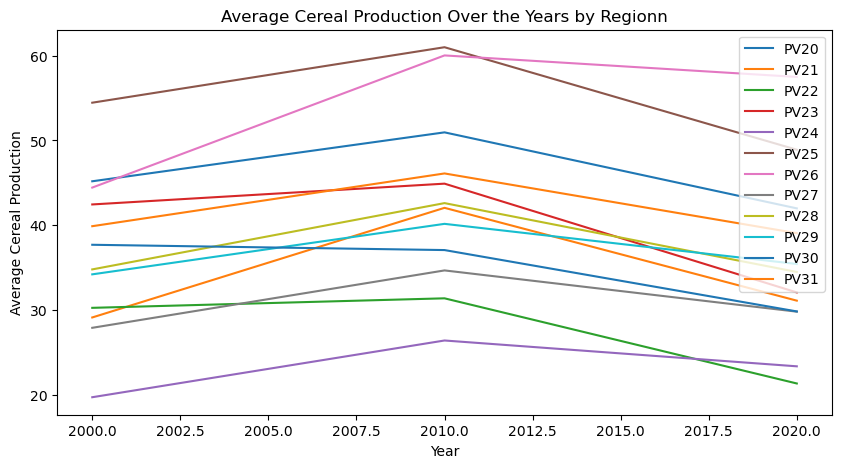

In [61]:
plt.figure(figsize=(10, 5))

for region in c_nl_crops['Regions'].unique():
    datos_region = c_nl_crops[c_nl_crops['Regions'] == region]
    plt.plot(datos_region['Year'], datos_region['avg_cereals'], label=region)

plt.xlabel('Year')
plt.ylabel('Average Cereal Production')
plt.title('Average Cereal Production Over the Years by Regionn')
plt.legend()
plt.show()

In [62]:
avg_group = c_nl_crops.groupby(['Year', 'Regions'])[avg_nl_crops].mean().reset_index()

In [63]:
avg_group.head()

Year Regions  avg_ArableLand  avg_cereals  avg_Horticulture  avg_Grassland
0  2000    PV20       56.691201    45.183864          0.659917      42.604217
1  2000    PV21       10.158951    29.106823          0.551014      89.259910
2  2000    PV22       44.781282    30.242846          0.775398      54.275730
3  2000    PV23       10.667416    42.448835          0.633967      88.651749
4  2000    PV24       75.637891    19.690898          6.185461      17.994706

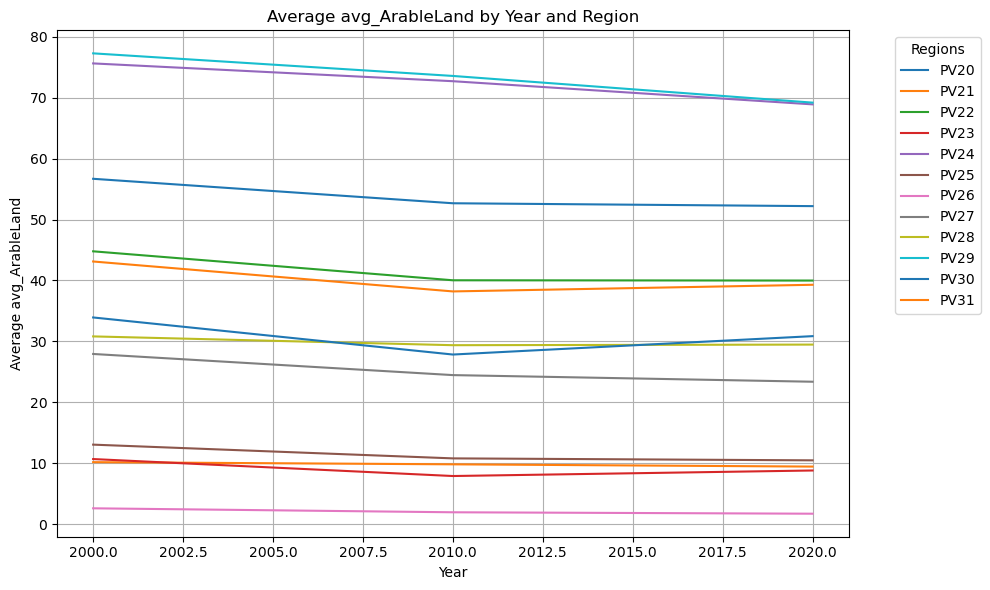

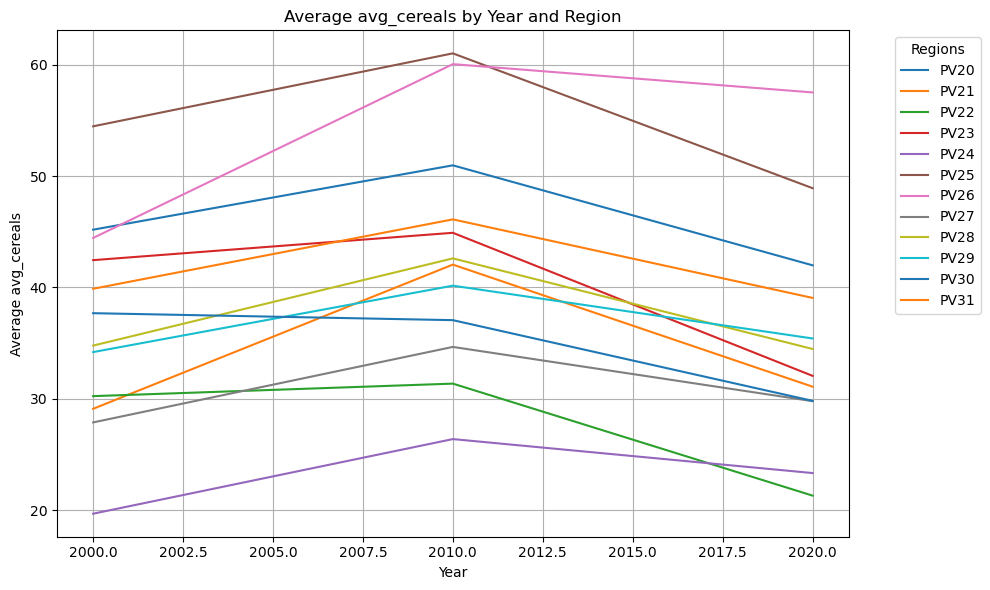

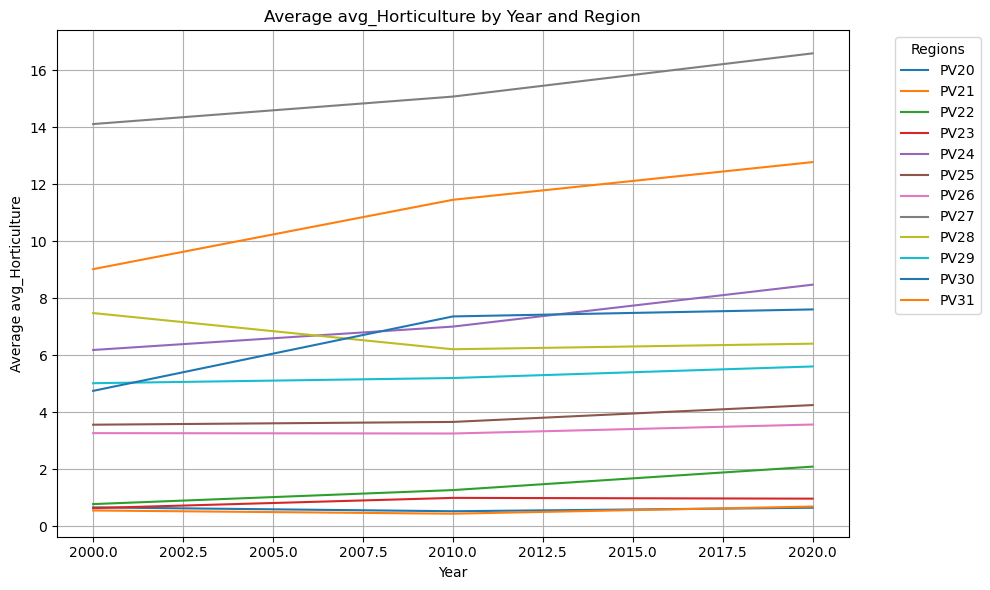

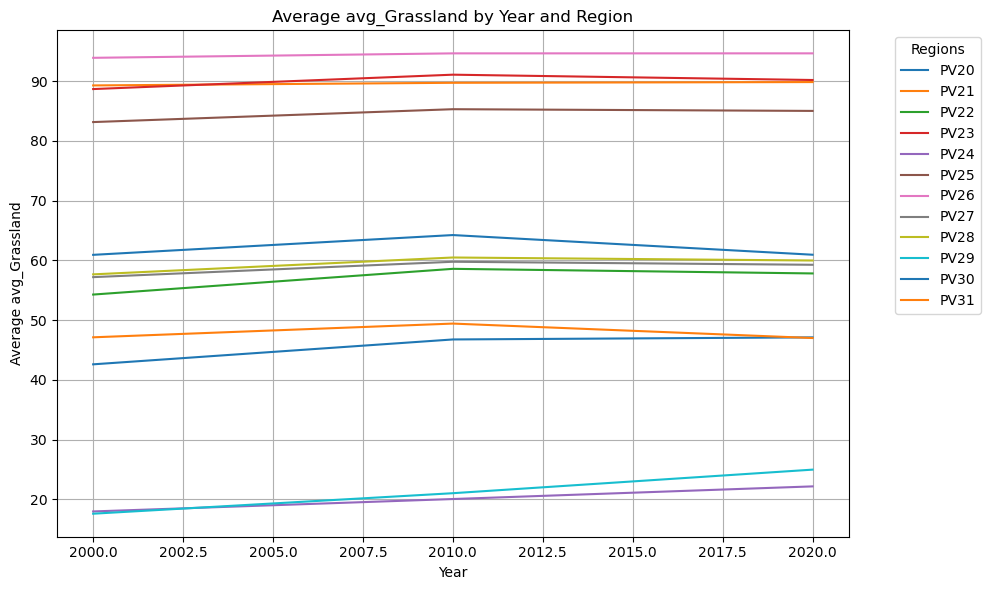

In [64]:
for column in avg_nl_crops:
    plt.figure(figsize=(10, 6))
    
    for region in c_nl_crops['Regions'].unique():
        region_data = c_nl_crops[c_nl_crops['Regions'] == region]
        plt.plot(region_data['Year'], region_data[column], label=region)
    
    
    plt.xlabel('Year')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by Year and Region')
    plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
  
    plt.show()

In [65]:
c_nl_crops.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0    PV20  2000  332202.56   8312      188329.62   85094.60           4214   
1    PV20  2010  323618.52   6618      170457.72   86863.34           3102   
2    PV20  2020  322719.77   4948      168464.28   70730.10           2728   
3    PV21  2000  462071.72  14104       46941.64   13663.22           1962   
4    PV21  2010  458140.70  11380       44902.86   18881.20           1480   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0       3572           2192.26               524           14838.32   
1       2760           1696.94               324           12243.10   
2       2338           2089.84               338           11851.70   
3       1306           2546.08               444           13920.04   
4       1094           2006.16               250           27760.86   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  Land_Use_Change  \
0       141532.30            6292        5390              NaN   
1       151341.42            5408        4356        -2.583978   
2       152047.14            4168        2940        -0.277719   
3       412444.80           13210       12412              NaN   
4       410954.08           10802       10190        -0.850738   

   avg_ArableLand  avg_cereals  avg_Horticulture  avg_Grassland  
0       56.691201    45.183864          0.659917      42.604217  
1       52.672424    50.958877          0.524364      46.765377  
2       52.201413    41.985221          0.647571      47.114294  
3       10.158951    29.106823          0.551014      89.259910  
4        9.801107    42.048992          0.437892      89.700409

In [66]:
# ratio of hectare use for number of farms 
c_nl_crops['AN_UAA'] = (c_nl_crops['A_UAA'] / c_nl_crops['N_UAA'])
c_nl_crops['AN_Arable_Land'] = (c_nl_crops['A_Arable_Land'] / c_nl_crops['N_Arable_Land'])
c_nl_crops['AN_Cereals'] = (c_nl_crops['A_Cereals'] / c_nl_crops['N_Cereals'])
c_nl_crops['AN_Horticulture'] = (c_nl_crops['A_Horticulture_O'] / c_nl_crops['N_Horticulture_O'])
c_nl_crops['AN_Grassland'] = (c_nl_crops['A_Grassland_FP'] / c_nl_crops['N_Grassland_FP'])

In [67]:
na_nl_col = ['AN_UAA','AN_Arable_Land','AN_Cereals', 'AN_Horticulture','AN_Grassland']

In [68]:
na_group = c_nl_crops.groupby(['Year', 'Regions']).sum().reset_index()

In [69]:
na_group.head()

Year Regions      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0  2000    PV20  332202.56   8312      188329.62   85094.60           4214   
1  2000    PV21  462071.72  14104       46941.64   13663.22           1962   
2  2000    PV22  318528.04   9766      142640.94   43138.68           4556   
3  2000    PV23  436719.82  22540       46586.72   19775.52           4874   
4  2000    PV24  183272.35   4634      138623.34   27296.18           3848   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  ...  Land_Use_Change  \
0       3572           2192.26               524  ...              0.0   
1       1306           2546.08               444  ...              0.0   
2       3440           2469.86               584  ...              0.0   
3       3078           2768.66               822  ...              0.0   
4       2716          11336.24              1258  ...              0.0   

   avg_ArableLand  avg_cereals  avg_Horticulture  avg_Grassland     AN_UAA  \
0       56.691201    45.183864          0.659917      42.604217  39.966622   
1       10.158951    29.106823          0.551014      89.259910  32.761750   
2       44.781282    30.242846          0.775398      54.275730  32.616019   
3       10.667416    42.448835          0.633967      88.651749  19.375325   
4       75.637891    19.690898          6.185461      17.994706  39.549493   

   AN_Arable_Land  AN_Cereals  AN_Horticulture  AN_Grassland  
0       44.691414   23.822676         4.183702     22.494008  
1       23.925403   10.461884         5.734414     31.222165  
2       31.308371   12.540314         4.229212     22.244393  
3        9.558211    6.424795         3.368200     17.887625  
4       36.024777   10.050140         9.011320     24.142987  

[5 rows x 24 columns]

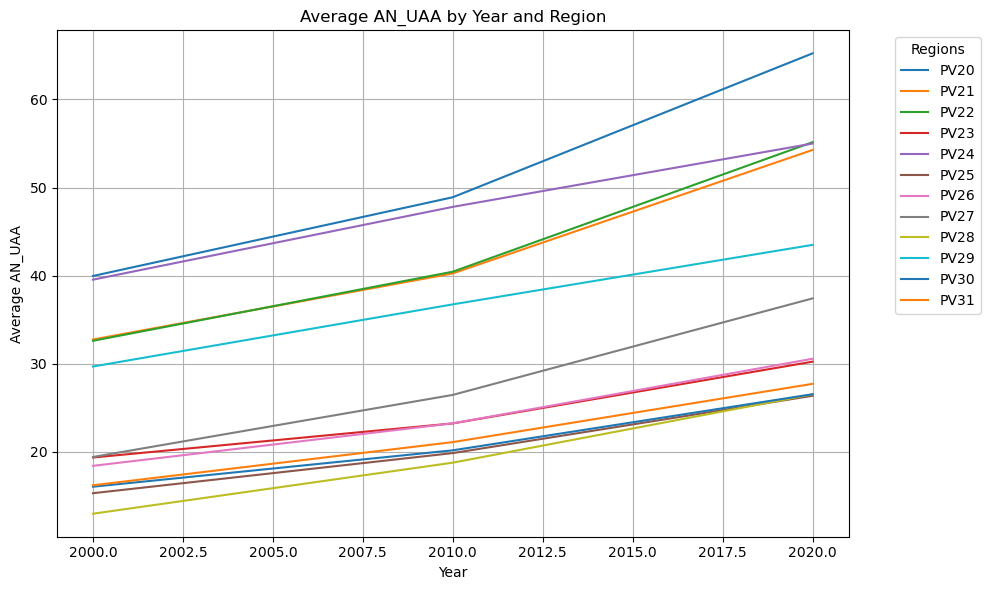

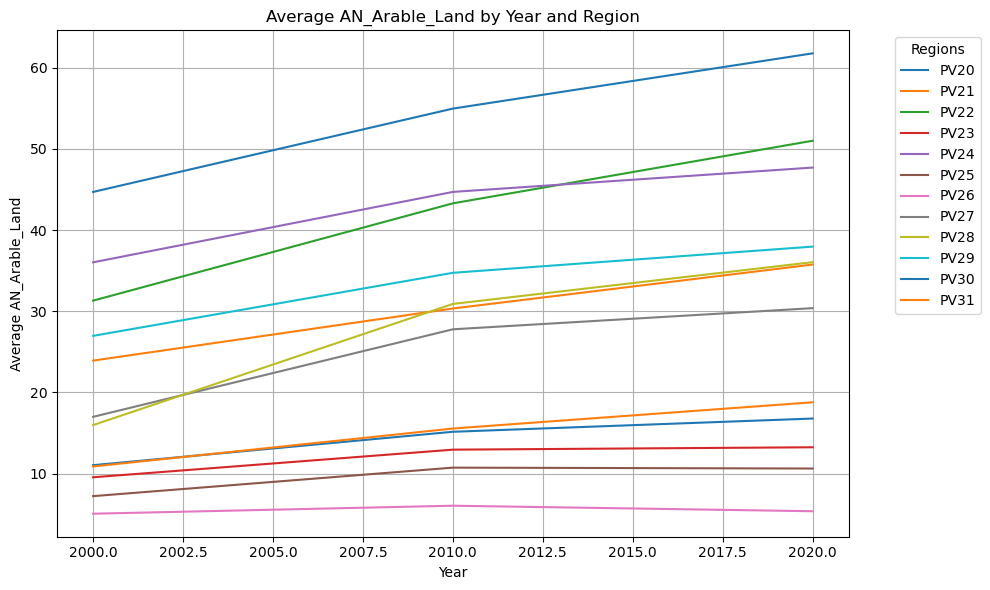

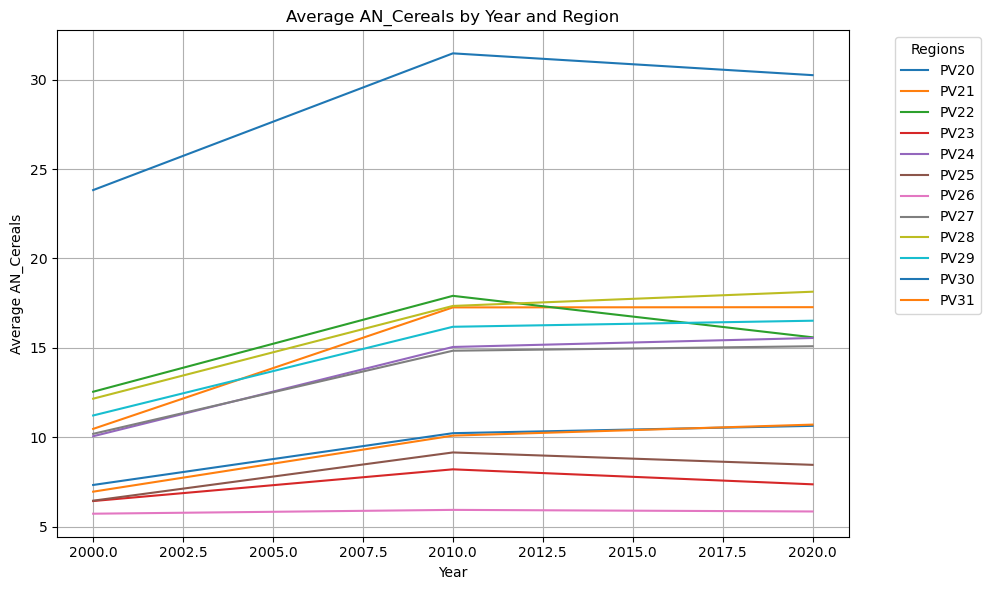

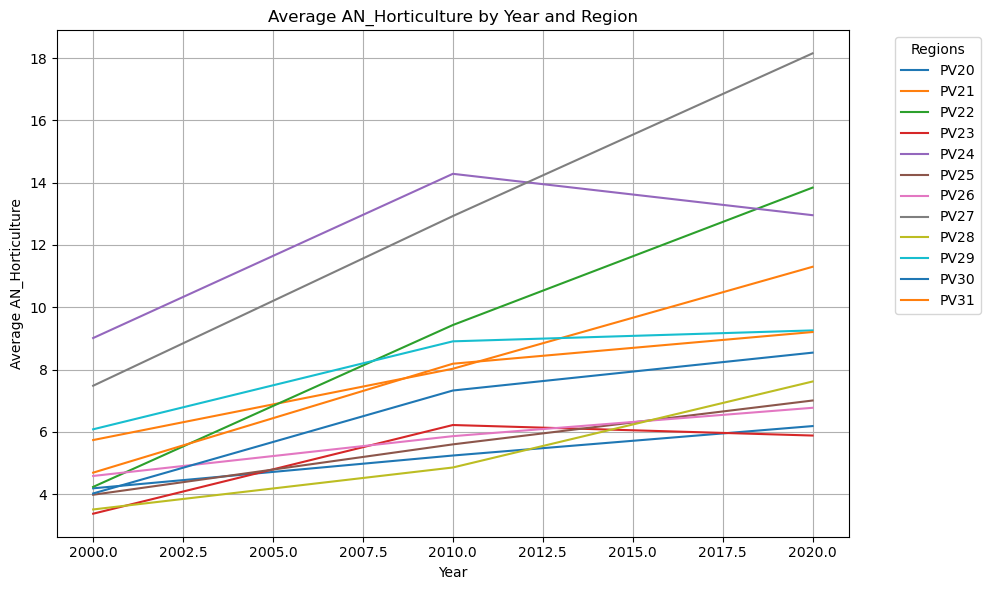

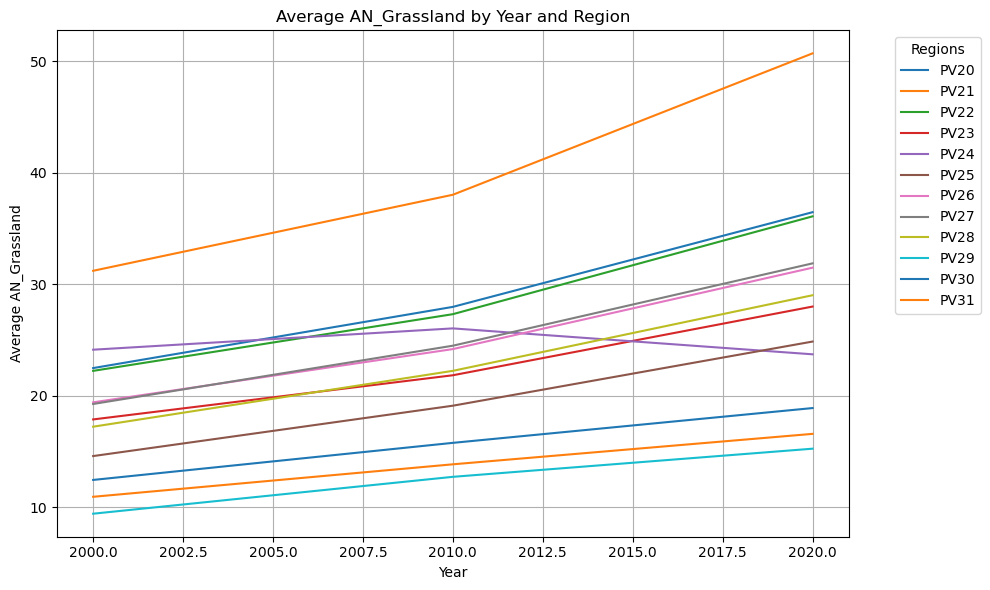

In [70]:
for column in na_nl_col:
    plt.figure(figsize=(10, 6))
    
    for region in na_group['Regions'].unique():
        region_data = na_group[na_group['Regions'] == region]
        plt.plot(region_data['Year'], region_data[column], label=region)
    
    plt.xlabel('Year')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by Year and Region')
    plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

In [71]:
na_group_nl = na_group.copy()
na_group_nl= na_group_nl.drop(['Regions' ], axis=1)

In [72]:
na_group_nl = na_group_nl.groupby('Year').sum().reset_index()
na_group_nl.head()

Year       A_UAA   N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0  2000  3951008.55  191888     1268879.34  451495.34          71744   
1  2010  3744638.81  141254     1084141.60  437527.06          41928   
2  2020  3628901.70  102564     1053686.46  347091.92          37338   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  ...  \
0      45330         162121.58             33176         2104176.22  ...   
1      29984         174145.94             22074         2061498.82  ...   
2      23974         186255.50             19036         2015578.26  ...   

   Land_Use_Change  avg_ArableLand  avg_cereals  avg_Horticulture  \
0         0.000000      426.602343   440.003717         56.025883   
1       -61.943079      389.225485   517.314031         62.456004   
2       -29.183294      383.622605   424.768911         69.692999   

   avg_Grassland      AN_UAA  AN_Arable_Land  AN_Cereals  AN_Horticulture  \
0     710.302765  292.450472      239.715492  123.282589        60.852990   
1     741.016309  367.120469      327.159854  173.610985        96.848164   
2     738.885466  478.575320      365.420480  171.377306       116.710204   

   AN_Grassland  
0    221.357714  
1    273.714089  
2    343.114537  

[3 rows x 23 columns]

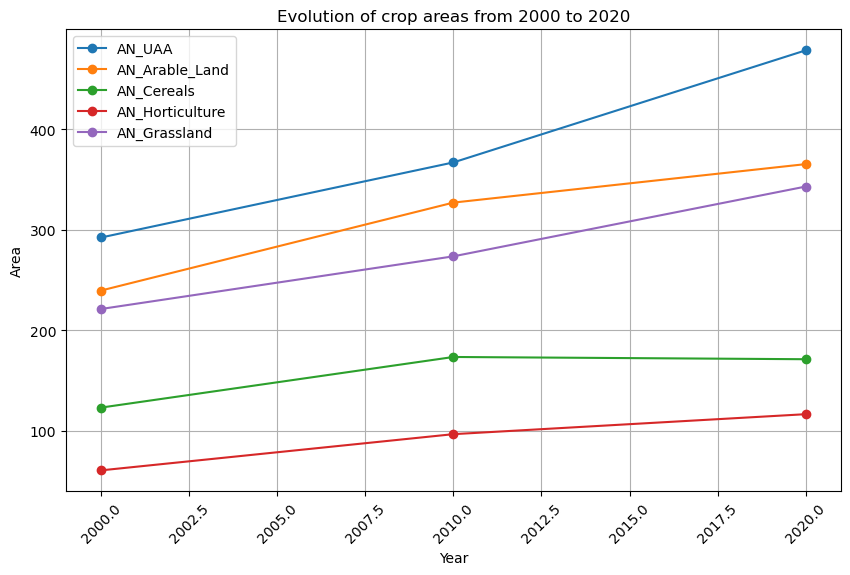

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(na_group_nl['Year'], na_group_nl['AN_UAA'], marker='o', label='AN_UAA')
plt.plot(na_group_nl['Year'], na_group_nl['AN_Arable_Land'], marker='o', label='AN_Arable_Land')
plt.plot(na_group_nl['Year'], na_group_nl['AN_Cereals'], marker='o', label='AN_Cereals')
plt.plot(na_group_nl['Year'], na_group_nl['AN_Horticulture'], marker='o', label='AN_Horticulture')
plt.plot(na_group_nl['Year'], na_group_nl['AN_Grassland'], marker='o', label='AN_Grassland')

plt.title('Evolution of crop areas from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Area')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [74]:
region_grouped = nl_crops_df.groupby(['Regions', 'Year']).sum()

## Comparing Data 

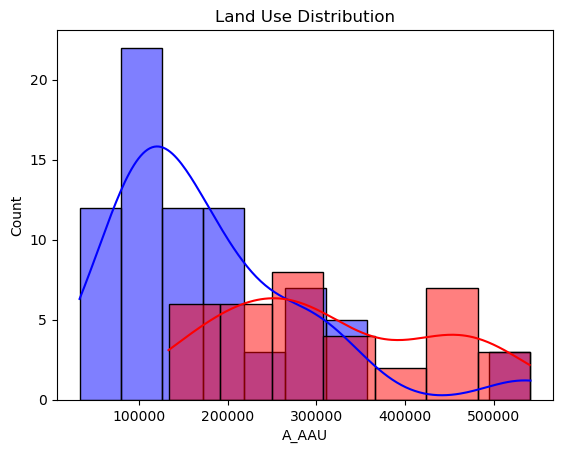

In [76]:
sns.histplot(ire_crops_df['A_AAU'], kde=True, color='blue', label='Ireland')
sns.histplot(nl_crops_df['A_UAA'], kde=True, color='red', label='Netherland')
plt.title('Land Use Distribution')
plt.show()

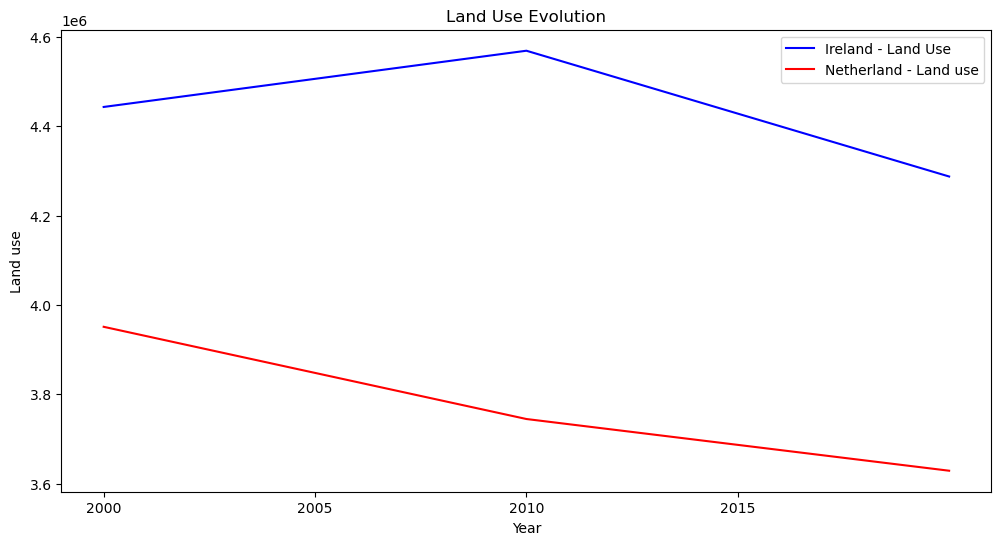

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(na_group_ire['Year'], na_group_ire['A_AAU'], label='Ireland - Land Use', color='blue')
plt.plot(na_group_nl['Year'], na_group_nl['A_UAA'], label='Netherland - Land use', color='red')
plt.legend()
plt.title('Land Use Evolution')
plt.xlabel('Year')
plt.ylabel('Land use')
plt.xticks(range(na_group_nl['Year'].min(), na_group_nl['Year'].max(), 5)) 
plt.show()

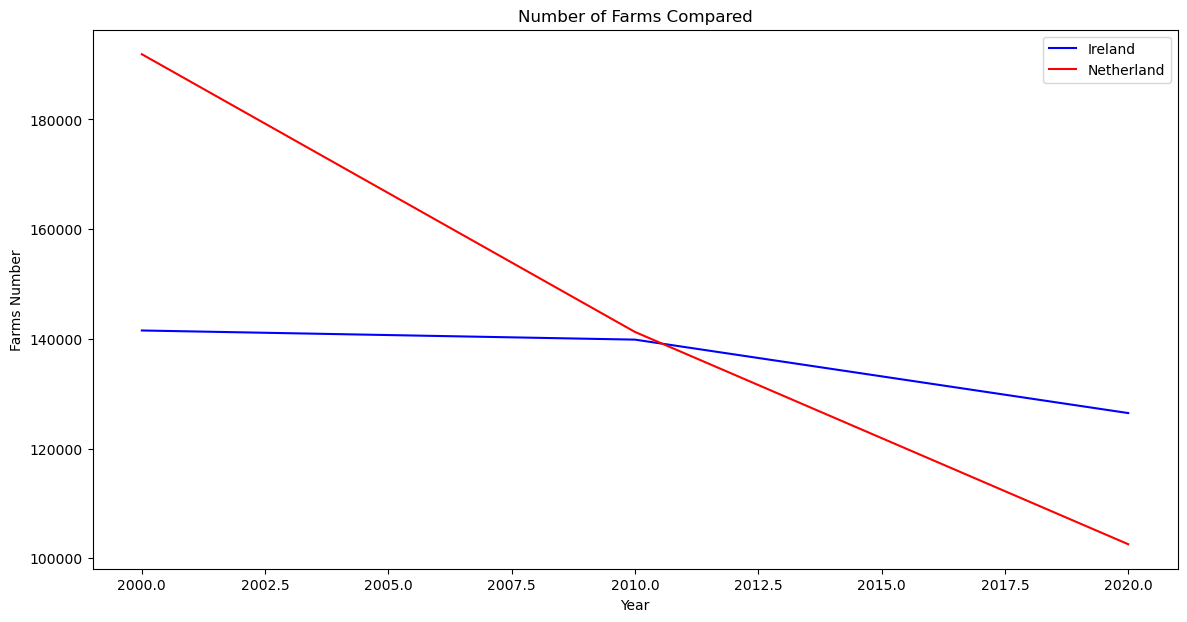

In [78]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='N_AAU', color='blue', data=na_group_ire, label='Ireland')
sns.lineplot(x='Year', y='N_UAA', color='red', data=na_group_nl, label='Netherland')
plt.title('Number of Farms Compared')
plt.xlabel('Year')
plt.ylabel('Farms Number')
plt.legend()
plt.show()

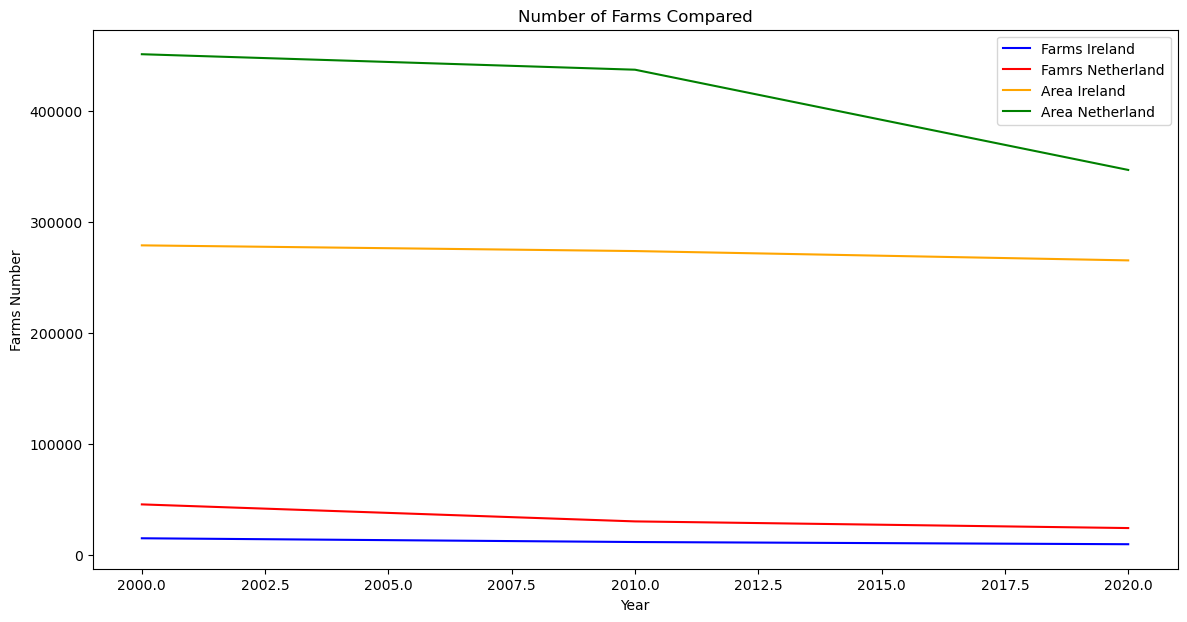

In [79]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='N_Cereals', color='blue', data=na_group_ire, label='Farms Ireland')
sns.lineplot(x='Year', y='N_Cereals', color='red', data=na_group_nl, label='Famrs Netherland')
sns.lineplot(x='Year', y='A_Cereals', color='Orange', data=na_group_ire, label='Area Ireland')
sns.lineplot(x='Year', y='A_Cereals', color='Green', data=na_group_nl, label='Area Netherland')
plt.title('Number of Farms Compared')
plt.xlabel('Year')
plt.ylabel('Farms Number')
plt.legend()
plt.show()

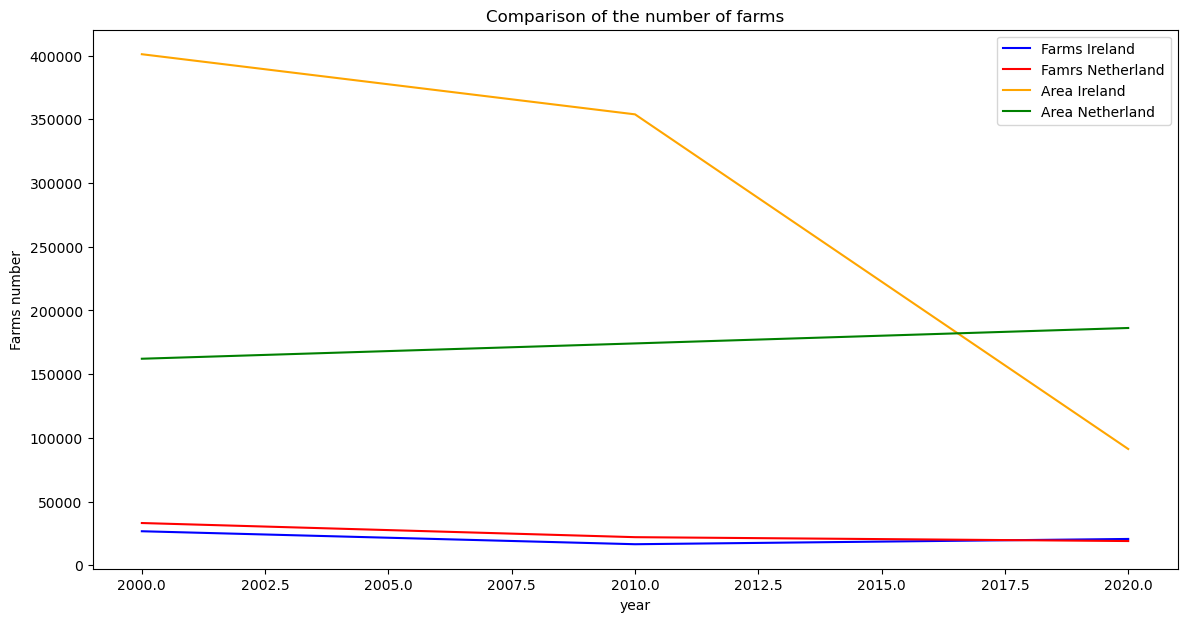

In [186]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='N_Horticulture', color='blue', data=na_group_ire, label='Farms Ireland')
sns.lineplot(x='Year', y='N_Horticulture_O', color='red', data=na_group_nl, label='Famrs Netherland')
sns.lineplot(x='Year', y='A_Horticulture', color='Orange', data=na_group_ire, label='Area Ireland')
sns.lineplot(x='Year', y='A_Horticulture_O', color='Green', data=na_group_nl, label='Area Netherland')
plt.title('Comparison of the number of farms')
plt.xlabel('year')
plt.ylabel('Farms number')
plt.legend()
plt.show()

In [81]:
ire_crops_df = ire_crops_df.sort_values(by='Year')
nl_crops_df = nl_crops_df.sort_values(by='Year')

In [82]:
ire_crops_df['Land_Use_Change'] = ire_crops_df['A_AAU'].diff()
nl_crops_df['Land_Use_Change'] = nl_crops_df['A_UAA'].diff()

In [83]:
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

In [84]:
years_ire = ire_crops_df['Year'].unique()
conf_intervals_ire = []
for year in years_ire:
    year_data = ire_crops_df[ire_crops_df['Year'] == year]['Land_Use_Change'].dropna()
    if not year_data.empty:
        conf_intervals_ire.append(calculate_confidence_interval(year_data))

years_nl = nl_crops_df['Year'].unique()
conf_intervals_nl = []
for year in years_nl:
    year_data = nl_crops_df[nl_crops_df['Year'] == year]['Land_Use_Change'].dropna()
    if not year_data.empty:
        conf_intervals_nl.append(calculate_confidence_interval(year_data))

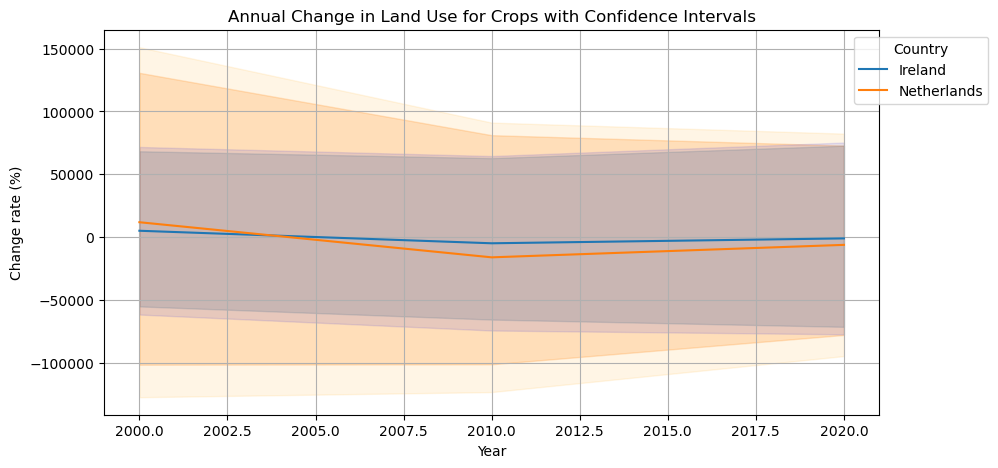

In [85]:
conf_intervals_ire = np.array(conf_intervals_ire)
conf_intervals_nl = np.array(conf_intervals_nl)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Land_Use_Change', data=ire_crops_df, label='Ireland')
sns.lineplot(x='Year', y='Land_Use_Change', data=nl_crops_df, label='Netherlands')
plt.fill_between(years_ire, conf_intervals_ire[:, 1], conf_intervals_ire[:, 2], color='blue', alpha=0.1)
plt.fill_between(years_nl, conf_intervals_nl[:, 1], conf_intervals_nl[:, 2], color='orange', alpha=0.1)
plt.title('Annual Change in Land Use for Crops with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Change rate (%)')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

## Inferential statistics 

In [86]:
na_ire_group.head()

Year   County    N_AAU  N_Pasture   N_Hay  N_Grass_silage  N_Horticulture  \
0  2000   Carlow   1882.0       1545   793.0          1121.0           940.0   
1  2000    Cavan   5492.0       4699  1712.0          4421.0           300.0   
2  2000    Clare   6722.0       5452  3065.0          5183.0           490.0   
3  2000     Cork  14231.0      11929  4346.0         11295.0          4520.0   
4  2000  Donegal   8801.0       6257  2482.0          4821.0          1330.0   

   N_Cereals  N_Rough_grazing  N_Grassland  ...  avg_Rough_Grazing  \
0      680.0            430.0         1802  ...           5.111843   
1       40.0           1080.0         5463  ...           5.896728   
2       30.0           2030.0         6700  ...          13.935489   
3     2570.0           4120.0        13882  ...          10.682766   
4      730.0           4570.0         8734  ...          37.869563   

   avg_Grassland     AN_AAU  AN_Pastures    AN_Hay  AN_Grass_Silage  \
0      72.659910  38.220510    19.961165  5.527112        11.922391   
1      98.443397  25.184632    16.295169  4.250584         9.988012   
2      99.002266  31.311663    20.096295  5.221207        10.317963   
3      87.478479  37.508608    20.418224  4.374827        13.044887   
4      95.548762  26.202704    14.373821  3.743352         7.008090   

   AN_Horticulture  AN_Cereals  AN_Rough_Grazing  AN_Grassland  
0        20.921277   20.132353          8.551163     29.003885  
1         7.176667   19.200000          7.551852     24.924217  
2         4.285714    8.033333         14.448768     31.101045  
3        14.787168   16.775097         13.840534     33.636868  
4         7.718045    9.595890         19.109628     25.228418  

[5 rows x 34 columns]

In [87]:
na_group.dtypes

Year                   int64
Regions               object
A_UAA                float64
N_UAA                  int64
A_Arable_Land        float64
A_Cereals            float64
N_Arable_Land          int64
N_Cereals              int64
A_Horticulture_O     float64
N_Horticulture_O       int64
A_Horticulture_UG    float64
A_Grassland_FP       float64
N_Grassland_FP         int64
Grazing_LS             int64
Land_Use_Change      float64
avg_ArableLand       float64
avg_cereals          float64
avg_Horticulture     float64
avg_Grassland        float64
AN_UAA               float64
AN_Arable_Land       float64
AN_Cereals           float64
AN_Horticulture      float64
AN_Grassland         float64
dtype: object

## Comparison 1: Comparison of Land use change between Ireland and Netherlands
### Hypothesis:

- Null Hypothesis (H0): There is no significant difference in Land use change between Ireland and Netherlands .
- Alternative Hypothesis (H1): There is a difference in Land use change Ireland and Netherlands.
### Tests Used:

- Parametric Test: Independent t-test
- Non-parametric Test: Mann-Whitney U test
### Explanation:
- Independent t-test is used to compare means between two independent groups.
- Mann-Whitney U test is a non-parametric alternative to the independent t-test when the assumptions are not met.

In [88]:
t_stat_crops, p_value_crops = ttest_ind(na_ire_group['Land_Use_Change'], na_group['Land_Use_Change'])

# Perform non-parametric test: Mann-Whitney U test
u_stat_fare, p_val_fare_u = stats.mannwhitneyu(na_ire_group['Land_Use_Change'], na_group['Land_Use_Change'])
# Interpretation of Comparison 4: Comparison of Fare by Passenger Class
print("1. Comparison of Land use change between Ireland and Netherlands.")
print("Parametric t-test p-value:", p_value_crops)
print("Non-parametric Mann-Whitney U test p-value:", p_val_fare_u)

if p_value_crops < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in Land use change between Ireland and Netherlands.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in Land use change between Ireland and Netherlands.")

if p_val_fare_u < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in Land use change between Ireland and Netherlands.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in Land use change between Ireland and Netherlands.")

1. Comparison of Land use change between Ireland and Netherlands.
Parametric t-test p-value: 1.0923351826168e-05
Non-parametric Mann-Whitney U test p-value: 2.277018921527217e-05
Parametric t-test: Reject null hypothesis. There is a significant difference in Land use change between Ireland and Netherlands.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in Land use change between Ireland and Netherlands.


## Comparison 2: Comparison of Land use for Farms between Ireland and Netherlands
### Hypothesis:

- Null Hypothesis (H0): There is no significant difference in Land use for farms between Ireland and Netherlands .
- Alternative Hypothesis (H1): There is a difference in Land use for farms between Ireland and Netherlands.
### Tests Used:

- Parametric Test: Independent t-test
- Non-parametric Test: Mann-Whitney U test
### Explanation:
- Independent t-test is used to compare means between two independent groups.
- Mann-Whitney U test is a non-parametric alternative to the independent t-test when the assumptions are not met.

In [89]:
t_stat_crops, p_value_crops = ttest_ind(na_ire_group['AN_AAU'], na_group['AN_UAA'])

# Perform non-parametric test: Mann-Whitney U test
u_stat_fare, p_val_fare_u = stats.mannwhitneyu(na_ire_group['AN_AAU'], na_group['AN_UAA'])
# Interpretation of Comparison 4: Comparison of Fare by Passenger Class
print("2. Comparison of Land use for Farms between Ireland and Netherlands")
print("Parametric t-test p-value:", p_value_crops)
print("Non-parametric Mann-Whitney U test p-value:", p_val_fare_u)

if p_value_crops < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in land use per farm.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in land use per farm.")

if p_val_fare_u < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in land use per farm.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in land use per farm.")

2. Comparison of Land use for Farms between Ireland and Netherlands
Parametric t-test p-value: 0.11155575377490178
Non-parametric Mann-Whitney U test p-value: 0.043859652113980734
Parametric t-test: Fail to reject null hypothesis. There is no significant difference in land use per farm.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in land use per farm.


## Comparison 3: Comparison of Total Farms between Ireland and Netherlands
### Hypothesis:

- Null Hypothesis (H0): There is no difference in fare prices among different passenger classes.
- Alternative Hypothesis (H1): There is a difference in fare prices among different passenger classes.
## Tests Used:

- Parametric Test: Independent t-test
- Non-parametric Test: Mann-Whitney U test
## Explanation:
- Independent t-test is used to compare means between two independent groups.
- Mann-Whitney U test is a non-parametric alternative to the independent t-test when the assumptions are not met.

In [90]:
t_stat_crops, p_value_crops = ttest_ind(na_ire_group['N_AAU'], na_group['N_UAA'])

# Perform non-parametric test: Mann-Whitney U test
u_stat_fare, p_val_fare_u = stats.mannwhitneyu(na_ire_group['N_AAU'], na_group['N_UAA'])
# Interpretation of Comparison 4: Comparison of Fare by Passenger Class
print("1. Comparison of")
print("Parametric t-test p-value:", p_value_crops)
print("Non-parametric Mann-Whitney U test p-value:", p_val_fare_u)

if p_value_crops < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

if p_val_fare_u < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

1. Comparison of
Parametric t-test p-value: 8.737038444647416e-09
Non-parametric Mann-Whitney U test p-value: 3.049252369769828e-08
Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.


##  Testing 4: Tendency testing of Ireland land use
### Hypothesis:

- Null Hypothesis (H0): There is There is a significant trend in land use in Ireland.
- Alternative Hypothesis (H1): There is no significant trend in land use in Ireland.

### Tests Used:
- Parametric Test: OLS (Least Squares)
- Non-parametric Test: Mann-Kendall

### Explanation:
- OLS(Least Squares) is used to assess the linear relationship between a dependent variable and an independent variable.
- Mann-Kendall test is used to detect trends in time series without making assumptions about the distribution of the data.

In [201]:
# Perform non-parametric test: OLS (Least Squares)
X = sm.add_constant(na_ire_group['N_AAU'])
model_crops_ireland = sm.OLS(na_ire_group['A_AAU'], X).fit()
print(model_crops_ireland.summary())

# Perform non-parametric test: Mann-Kendall
tau_crops, p_value_tau_crops = kendalltau(na_ire_group['N_AAU'], na_ire_group['A_AAU'])

# Interpretation of Comparison 4: Trend in Crop Land Use in Ireland
print("4. Trend in Crop Land Use in Ireland")
print("Non-parametric Mann-Kendall p-value:", p_value_tau_crops)


print(f'Mann-Kendall Test for Trend in Crop Land Use in Ireland: Tau: {tau_crops}, P-value: {p_value_tau_crops}')
if p_value_tau_crops < 0.05:
    print("Non-parametric Mann-Kendall: Reject null hypothesis. There is a significant trend in land use in Ireland.")
else:
    print("Non-parametric Mann-Kendall: Fail to reject null hypothesis. There is no significant trend in land use in Ireland.")

                            OLS Regression Results                            
Dep. Variable:                  A_AAU   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     407.5
Date:                Sun, 26 May 2024   Prob (F-statistic):           8.08e-32
Time:                        21:12:44   Log-Likelihood:                -917.25
No. Observations:                  76   AIC:                             1838.
Df Residuals:                      74   BIC:                             1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.432e+04   8931.751      2.723      0.0

##  Testing 5: Tendency testing of Netherland land use
### Hypothesis:

- Null Hypothesis (H0): There is There is a significant trend in land use in Netherland.
- Alternative Hypothesis (H1): There is no significant trend in land use in Netherland.

### Tests Used:
- Parametric Test: OLS (Least Squares)
- Non-parametric Test: Mann-Kendall

### Explanation:
- OLS(Least Squares) is used to assess the linear relationship between a dependent variable and an independent variable.
- Mann-Kendall test is used to detect trends in time series without making assumptions about the distribution of the data.

In [205]:
# Perform non-parametric test: OLS (Least Squares)
X = sm.add_constant(na_group['A_Grassland_FP'])
model_crops_netherland = sm.OLS(na_group['A_UAA'], X).fit()
print(model_crops_netherland.summary())

# Perform non-parametric test: Mann-Kendall
tau_crops, p_value_tau_crops = kendalltau(na_group['Year'], na_group['AN_UAA'])

# Interpretation of Comparison 4: Trend in Crop Land Use in Ireland
print("4. Trend in Crop Land Use in Netherland")
print("Non-parametric Mann-Kendall p-value:", p_value_tau_crops)


print(f'Mann-Kendall Test for Trend in Crop Land Use in Netherland: Tau: {tau_crops}, P-value: {p_value_tau_crops}')
if p_value_tau_crops < 0.05:
    print("Non-parametric Mann-Kendall: Reject null hypothesis. There is a significant trend in land use in Netherland.")
else:
    print("Non-parametric Mann-Kendall: Fail to reject null hypothesis. There is no significant trend in land use in Netherland.")

                            OLS Regression Results                            
Dep. Variable:                  A_UAA   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.61e-13
Time:                        21:17:01   Log-Likelihood:                -442.90
No. Observations:                  36   AIC:                             889.8
Df Residuals:                      34   BIC:                             893.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.478e+05   1.71e+04      8.

## Comparison 6: Correlation between 
### Hypothesis:

- Null Hypothesis (H0): There is no difference in fare prices among different passenger classes.
- Alternative Hypothesis (H1): There is a difference in fare prices among different passenger classes.

### Tests Used:
Parametric Test: Independent t-test
Non-parametric Test: Mann-Whitney U test

### Explanation:
- Independent t-test is used to compare means between two independent groups.
- Mann-Whitney U test is a non-parametric alternative to the independent t-test when the assumptions are not met.

In [93]:
corr_crops_ireland, p_value_corr_crops_ireland = pearsonr(na_ire_group['N_AAU'], na_ire_group['A_AAU'])
# Correlación de Spearman
spearman_crops_ireland, p_value_spearman_crops_ireland = spearmanr(na_ire_group['N_AAU'], na_ire_group['A_AAU'])
print(f'Correlación de Pearson en Irlanda entre número de granjas y uso de tierra en cultivos: Correlation coefficient: {corr_crops_ireland}, P-value: {p_value_corr_crops_ireland}')
print(f'Correlación de Spearman en Irlanda entre número de granjas y uso de tierra en cultivos: Correlation coefficient: {spearman_crops_ireland}, P-value: {p_value_spearman_crops_ireland}')


Correlación de Pearson en Irlanda entre número de granjas y uso de tierra en cultivos: Correlation coefficient: 0.9199483884890844, P-value: 8.081057071771598e-32
Correlación de Spearman en Irlanda entre número de granjas y uso de tierra en cultivos: Correlation coefficient: 0.906922220058486, P-value: 1.6853304385123624e-29


In [94]:
if p_value_corr_crops_ireland < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

if p_value_spearman_crops_ireland < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.


## Comparison 7:  Land use for different types of crops 
### Hypothesis:

- Null Hypothesis (H0): There is no difference in land use for different type of crops.
- Alternative Hypothesis (H1): There is a difference in land use for different type of crops.

## Tests Used:

- Parametric Test: One-way ANOVA
- Non-parametric Test: Kruskal-Wallis test
## Explanation:
- One-way ANOVA. The columns of data provided are used to calculate the F-statistic and p-value to determine if there are significant differences between the means of more than two groups.
- Kruskal-Wallis test, a non-parametric test similar to ANOVA but which does not require the assumption of normality in the data.

In [95]:
# One Way ANOVA

f_stat_class, p_val_class_f = stats.f_oneway(na_ire_group['A_Horticulture'], na_ire_group['A_Cereals'], na_group['A_Horticulture_O'], na_group['A_Cereals'])
# Kruskal-Wallis
h_stat_class, p_val_class_h = stats.kruskal(na_ire_group['A_Horticulture'], na_ire_group['A_Cereals'], na_group['A_Horticulture_O'], na_group['A_Cereals'])

print(f'ANOVA for Land Use in Different Types of Crops: F-statistic: {f_stat_class}, P-value: {p_val_class_f}')
print(f'Prueba de Kruskal-Wallis  for Land Use in Different Types of Cropss: H-statistic: {h_stat_class}, P-value: {p_val_class_h}')

ANOVA para Uso de Tierra en Diferentes Tipos de Cultivos: F-statistic: 23.510008217220843, P-value: 3.0809216939059877e-13
Prueba de Kruskal-Wallis para Uso de Tierra en Diferentes Tipos de Cultivos: H-statistic: 44.492472152603796, P-value: 1.1860887971315666e-09


In [96]:
# Interpretation of Comparison 2: Survival Rates by Passenger Class
print("2. Comparison of Survival Rates by Passenger Class:")
print("Parametric ANOVA p-value:", p_val_class_f)
print("Non-parametric Kruskal-Wallis H test p-value:", p_val_class_h)

if p_val_class_f < 0.05:
    print("Parametric ANOVA: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.")
else:
    print("Parametric ANOVA: Fail to reject null hypothesis. There is no significant difference in survival rates among passenger classes.")

if p_val_class_h < 0.05:
    print("Non-parametric Kruskal-Wallis H test: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.")
else:
    print("Non-parametric Kruskal-Wallis H test: Fail to reject null hypothesis. There is no significant difference in survival rates among passenger classes.")
print()

2. Comparison of Survival Rates by Passenger Class:
Parametric ANOVA p-value: 3.0809216939059877e-13
Non-parametric Kruskal-Wallis H test p-value: 1.1860887971315666e-09
Parametric ANOVA: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.
Non-parametric Kruskal-Wallis H test: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.



# 3. Machine Learnig 

In [97]:
g_data = nl_crops_df.groupby(['Regions', 'Year']).sum().reset_index()
g_data = g_data.drop(columns=['Land_Use_Change'])
g_data.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0    PV20  2000  332202.56   8312      188329.62   85094.60           4214   
1    PV20  2010  323618.52   6618      170457.72   86863.34           3102   
2    PV20  2020  322719.77   4948      168464.28   70730.10           2728   
3    PV21  2000  462071.72  14104       46941.64   13663.22           1962   
4    PV21  2010  458140.70  11380       44902.86   18881.20           1480   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0       3572           2192.26               524           14838.32   
1       2760           1696.94               324           12243.10   
2       2338           2089.84               338           11851.70   
3       1306           2546.08               444           13920.04   
4       1094           2006.16               250           27760.86   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  
0       141532.30            6292        5390  
1       151341.42            5408        4356  
2       152047.14            4168        2940  
3       412444.80           13210       12412  
4       410954.08           10802       10190

## 3.1 Random Forest


In [98]:
ire_crops_df['A_AAU'].describe()

count        76.000000
mean     174992.221053
std      108352.314202
min       33041.100000
25%      105729.075000
50%      134616.100000
75%      211220.000000
max      541314.000000
Name: A_AAU, dtype: float64

In [99]:
ire_crops_df.head()

Year     County   N_AAU  N_Pasture   N_Hay  N_Grass_silage  \
0   2000      Clare  6722.0       5452  3065.0          5183.0   
25  2000    Wexford  4612.0       3718  2014.0          2819.0   
24  2000  Westmeath  3442.0       3033  1385.0          2344.0   
23  2000    Wicklow  2412.0       2013   976.0          1408.0   
22  2000  Waterford  2792.0       2360   967.0          2020.0   

    N_Horticulture  N_Cereals  N_Rough_grazing  N_Grassland     A_AAU  \
0            490.0       30.0           2030.0         6700  210477.0   
25          2860.0     2380.0            610.0         4316  184985.0   
24           520.0      270.0            450.0         3411  119969.0   
23           680.0      480.0            720.0         2340  101707.0   
22           720.0      440.0            680.0         2729  124363.0   

    A_Pastures    A_Hay  A_Grass_Silage  A_Horticulture  A_Cereals  \
0       109565  16003.0         53478.0          2100.0      241.0   
25       71454  11354.0         37178.0         59886.0    45160.0   
24       75140   7264.0         27101.0          5751.0     4228.0   
23       49377   6184.0         19685.0         13959.0    10874.0   
22       61644   5452.0         33008.0         12514.0     8344.0   

    A_Rough_Grazing  A_Grassland  Land_Use_Change  
0           29331.0       208377              NaN  
25           5113.0       125099         -25492.0  
24           4713.0       114218         -65016.0  
23          12502.0        87748         -18262.0  
22          11745.0       111849          22656.0

In [100]:
features = ire_crops_df[['Year', 'N_AAU', 'N_Pasture', 'N_Hay', 'N_Grass_silage', 'N_Horticulture',
                        'N_Cereals', 'N_Rough_grazing', 'N_Grassland', 'A_Pastures', 'A_Hay',
                        'A_Grass_Silage','A_Horticulture','A_Cereals', 'A_Rough_Grazing','A_Grassland']]
target = ire_crops_df['A_AAU']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [102]:
y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 293436936.97491145
Mean Absolute Error: 11592.170046875017
R^2 Score: 0.9793964169895653


            Feature  Importance
15      A_Grassland    0.381629
1             N_AAU    0.126827
9        A_Pastures    0.104213
8       N_Grassland    0.102683
2         N_Pasture    0.089545
11   A_Grass_Silage    0.064230
4    N_Grass_silage    0.054152
6         N_Cereals    0.020693
13        A_Cereals    0.018939
5    N_Horticulture    0.012242
10            A_Hay    0.009652
14  A_Rough_Grazing    0.005844
12   A_Horticulture    0.004440
3             N_Hay    0.003654
7   N_Rough_grazing    0.001096
0              Year    0.000161


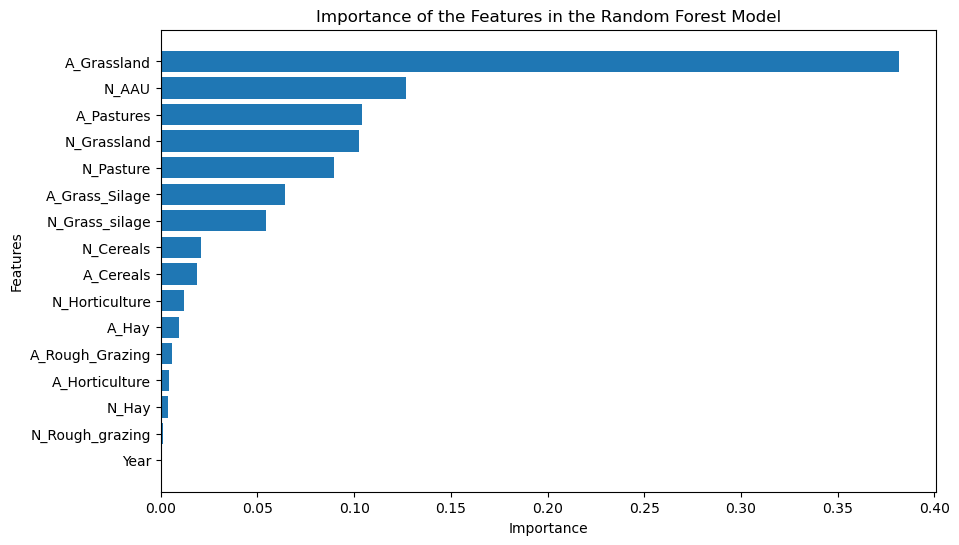

In [103]:
# Features importance 
importances = grid_search.best_estimator_.feature_importances_
feature_names = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Importance of the Features in the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

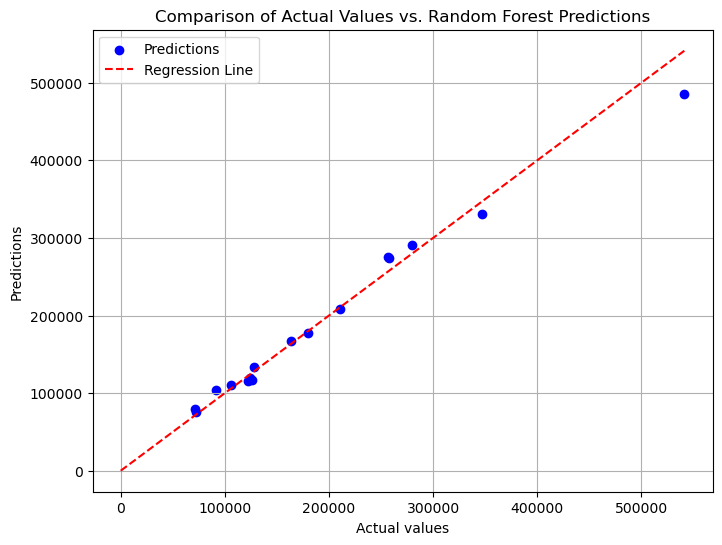

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Regression Line')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values vs. Random Forest Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [105]:
new_data_ire = pd.DataFrame({
    'Year': [2025, 2030, 2035],
    'N_AAU': [4100, 4300, 4500],
    'N_Pasture': [2700, 2500, 2300],
    'N_Hay': [850, 900, 950],
    'N_Grass_silage': [310, 330, 350],
    'N_Horticulture': [125, 135, 145],
    'N_Cereals': [2300, 2200, 2100],
    'N_Rough_grazing': [850, 900, 950],
    'N_Grassland': [310, 330, 350],
    'A_Pastures': [160000, 155000, 150000],
    'A_Hay': [152000, 150000, 148000],
    'A_Grass_Silage': [152000, 150000, 148000],
    'A_Horticulture': [1600, 1700, 1800],
    'A_Cereals': [125000, 120000, 115000],
    'A_Rough_Grazing': [850, 900, 950],
    'A_Grassland': [152000, 150000, 148000],
    
})

In [106]:
nn_data_ire = scaler.transform(new_data_ire)

In [107]:
new_predict = grid_search.best_estimator_.predict(nn_data_ire)
print("Future predictions of cultivated land area:", new_predict)

Future predictions of cultivated land area: [202342.527 202103.759 201884.069]


## Netherlands

In [108]:
nl_crops_df.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0     PV20  2000  332202.56   8312      188329.62   85094.60           4214   
27    PV29  2000  249767.11   8410      193045.28   66014.94           7158   
21    PV27  2000  273375.35  14066       76338.26   21287.00           4490   
18    PV26  2000  139673.73   7578        3601.82    1600.62            710   
15    PV25  2000  506391.25  33040       66006.46   35947.30           9122   

    N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0        3572           2192.26               524           14838.32   
27       5888          12535.92              2062           18642.92   
21       2090          38591.10              5160          210100.72   
18        280           4562.36               996           38495.94   
15       5578          18039.44              4536          138054.46   

    A_Grassland_FP  N_Grassland_FP  Grazing_LS  Land_Use_Change  
0        141532.30            6292        5390              NaN  
27        43999.48            4666        3052        -82435.45  
21       156344.98            8112        6576         23608.24  
18       131124.60            6752        6104       -133701.62  
15       420964.80           28832       24440        366717.52

In [109]:
nl_crops_df['A_UAA'].describe()

count        36.000000
mean     314570.807222
std      119909.802990
min      133285.740000
25%      229825.615000
50%      293835.620000
75%      439759.235000
max      540386.900000
Name: A_UAA, dtype: float64

In [110]:
features = nl_crops_df[['Year', 'N_UAA', 'A_Arable_Land', 'A_Cereals', 'N_Arable_Land', 'N_Cereals',
                        'A_Horticulture_O', 'N_Horticulture_O', 'A_Horticulture_UG', 'A_Grassland_FP', 'N_Grassland_FP']]
target = nl_crops_df['A_UAA']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [112]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 952871216.6943467
Mean Absolute Error: 23197.58006249958
R^2 Score: 0.9058538682962551


              Feature  Importance
9      A_Grassland_FP    0.706936
10     N_Grassland_FP    0.199059
1               N_UAA    0.025757
7    N_Horticulture_O    0.022599
5           N_Cereals    0.010015
3           A_Cereals    0.008373
2       A_Arable_Land    0.007682
6    A_Horticulture_O    0.006850
4       N_Arable_Land    0.006648
8   A_Horticulture_UG    0.005301
0                Year    0.000780


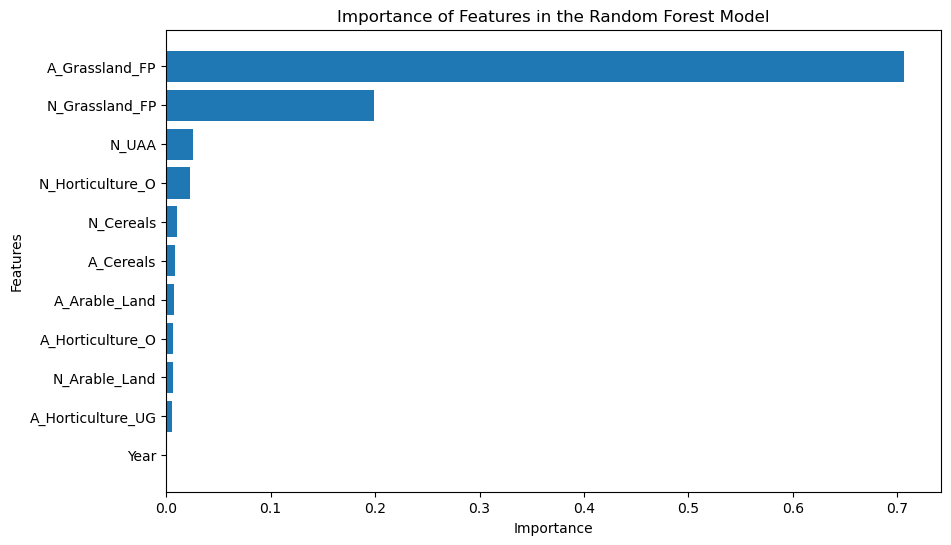

In [113]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Importance of Features in the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

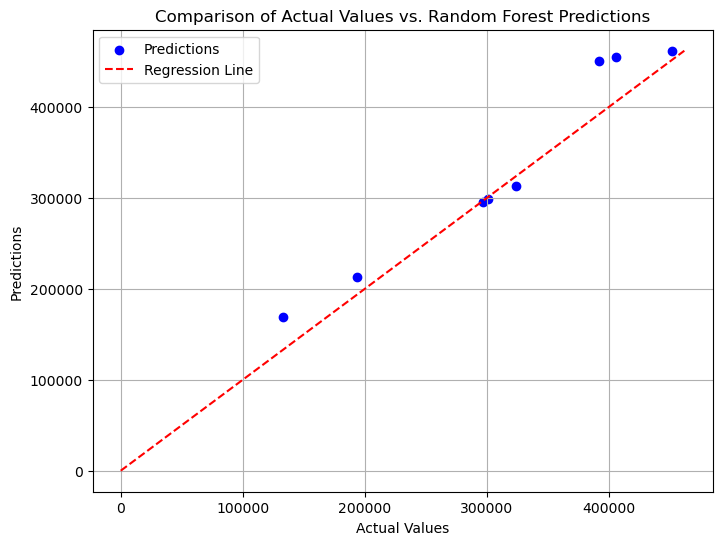

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values vs. Random Forest Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
nuevos_datos = pd.DataFrame({
    'Year': [2025, 2030, 2035],
    'N_UAA': [4000, 4200, 4400],
    'A_Arable_Land': [158464, 150464.28, 148464.28],
    'A_Cereals': [120000, 115000, 110000],
    'N_Arable_Land': [2628, 2428, 2528],
    'N_Cereals': [2238, 2138, 2238],
    'A_Horticulture_O': [1500, 1600, 1700],
    'N_Horticulture_O': [120, 130, 140],
    'A_Horticulture_UG': [800, 850, 900],
    'A_Grassland_FP': [150047, 148047.14, 154047.14],
    'N_Grassland_FP': [300, 320, 340]
})

In [116]:
nuevos_datos_normalizados = scaler.transform(nuevos_datos)

In [117]:
predicciones_futuras = grid_search.best_estimator_.predict(nuevos_datos_normalizados)
print("Predicciones futuras del área de tierra cultivada:", predicciones_futuras)

Predicciones futuras del área de tierra cultivada: [298459.2035  295095.35635 300682.33885]


# 3.2. Lineal Regression

## 3.2.1 Netherland 

In [118]:
g_data.head()

Regions  Year      A_UAA  N_UAA  A_Arable_Land  A_Cereals  N_Arable_Land  \
0    PV20  2000  332202.56   8312      188329.62   85094.60           4214   
1    PV20  2010  323618.52   6618      170457.72   86863.34           3102   
2    PV20  2020  322719.77   4948      168464.28   70730.10           2728   
3    PV21  2000  462071.72  14104       46941.64   13663.22           1962   
4    PV21  2010  458140.70  11380       44902.86   18881.20           1480   

   N_Cereals  A_Horticulture_O  N_Horticulture_O  A_Horticulture_UG  \
0       3572           2192.26               524           14838.32   
1       2760           1696.94               324           12243.10   
2       2338           2089.84               338           11851.70   
3       1306           2546.08               444           13920.04   
4       1094           2006.16               250           27760.86   

   A_Grassland_FP  N_Grassland_FP  Grazing_LS  
0       141532.30            6292        5390  
1       151341.42            5408        4356  
2       152047.14            4168        2940  
3       412444.80           13210       12412  
4       410954.08           10802       10190

In [119]:
g_data['A_UAA'].describe()

count        36.000000
mean     314570.807222
std      119909.802990
min      133285.740000
25%      229825.615000
50%      293835.620000
75%      439759.235000
max      540386.900000
Name: A_UAA, dtype: float64

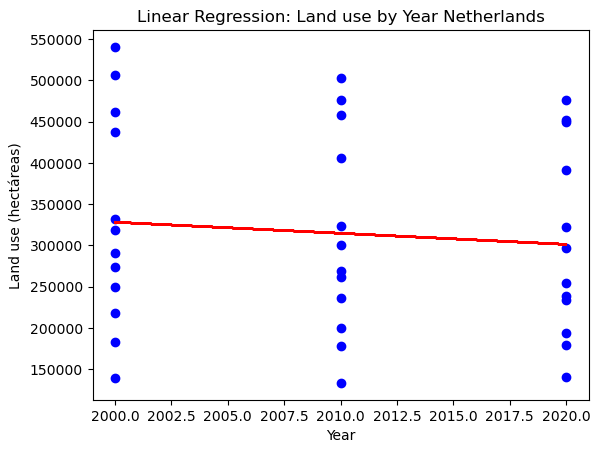

Slope coefficient: -1342.111875
Intercept: 3012215.6759722224


In [120]:
X = g_data[['Year']]
y = g_data['A_UAA']  

model = LinearRegression()
model.fit(X, y)

nl_predict = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, nl_predict, color='red')
plt.title('Linear Regression: Land use by Year Netherlands')
plt.xlabel('Year')
plt.ylabel('Land use (hectáreas)')
plt.show()

print('Slope coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

In [121]:
X = g_data.drop(['A_UAA', 'Regions'], axis=1) 
y = g_data['A_UAA']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f_values, p_values = f_regression(X_train, y_train)

features_selected = X_train.columns[p_values < 0.05]
X_train_selected = X_train[features_selected]
X_test_selected = X_test[features_selected]
model_train = LinearRegression()
model_train.fit(X_train_selected, y_train)

LinearRegression()

In [122]:
y_pred = model_train.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
print("mean Absolute Error:", mae)
print("mean squared error:", mse)
print("R^2 score:", r2)

mean Absolute Error: 28608.688261175717
mean squared error: 1258831845.255159
R^2 score: 0.9409410089113589


In [124]:
print('Slope coefficient:', model_train.coef_[0])
print('Intercept:', model_train.intercept_)

Slope coefficient: 4.498749875889819
Intercept: 117768.33160995587


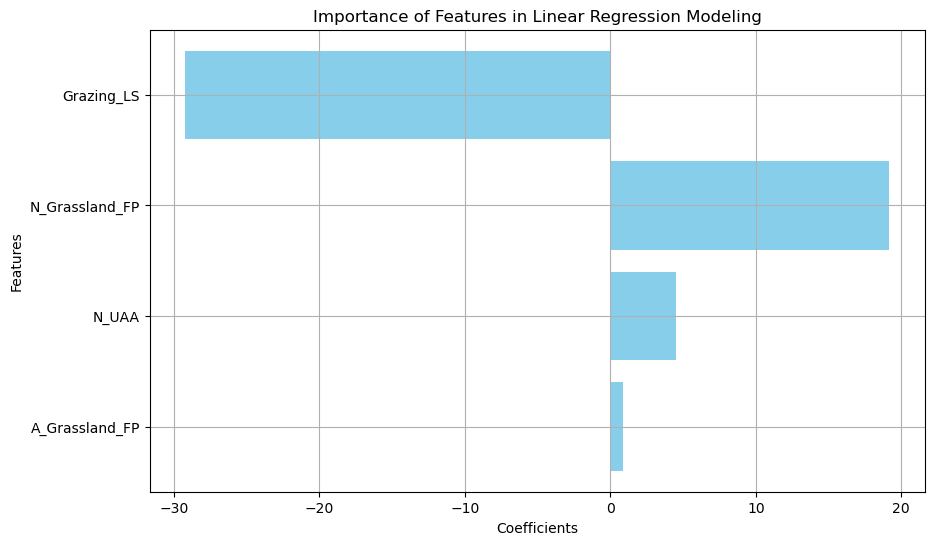

In [125]:
coefficients = model_train.coef_

feature_importance = pd.DataFrame({
    'Features': features_selected,
    'Importance': coefficients
})

feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Features'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Importance of Features in Linear Regression Modeling')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [126]:
new_NLdf = pd.DataFrame({
    'Year': [2025, 2030, 2035],
    'N_UAA': [4848, 4448, 4748],
    'A_Arable_Land': [158464, 150464.28, 188464.28],   
    'A_Arable_Land': [158464, 150464.28, 188464.28],
    'A_Grassland_FP': [150047, 148047.14, 154047.14],
    'N_Grassland_FP': [3468, 24684, 3368],
    'N_Arable_Land': [2628, 2428, 2528],
    'N_Cereals': [2238, 2138, 3238],
    'Grazing_LS': [2840, 2440, 2740]
})

In [127]:
new_predict = model_train.predict(new_NLdf[features_selected])

In [128]:
new_predict

array([256916.89512643, 671941.95326818, 261043.36133468])

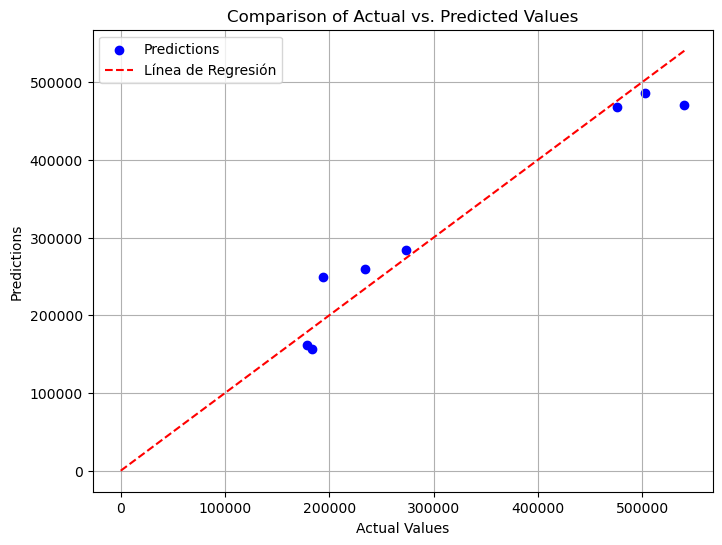

In [129]:
predict = model_train.predict(X_test_selected)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predict, color='blue', label='Predictions')

max_value = max(y_test.max(), predict.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Línea de Regresión')

plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()

plt.grid(True)
plt.show()

## Ireland


In [130]:
g_iredata = ire_crops_df.groupby(['County', 'Year']).sum().reset_index()
g_iredata = g_iredata.drop(columns=['Land_Use_Change'])
g_iredata.head()

County  Year   N_AAU  N_Pasture   N_Hay  N_Grass_silage  N_Horticulture  \
0  Carlow  2000  1882.0       1545   793.0          1121.0           940.0   
1  Carlow  2010  1800.0       1275   496.0           898.0           630.0   
2  Carlow  2020  1723.0       1407   462.0          1050.0           599.0   
3   Cavan  2000  5492.0       4699  1712.0          4421.0           300.0   
4   Cavan  2010  5280.0       3899   859.0          3429.0           130.0   

   N_Cereals  N_Rough_grazing  N_Grassland     A_AAU  A_Pastures   A_Hay  \
0      680.0            430.0         1802   71931.0       30840  4383.0   
1      540.0            470.0         1701   70637.0       33058  4049.0   
2      483.0            308.0         1664   70209.1       30542  3022.3   
3       40.0           1080.0         5463  138314.0       76571  7277.0   
4       10.0           1340.0         5207  139374.0       82775  5818.0   

   A_Grass_Silage  A_Horticulture  A_Cereals  A_Rough_Grazing  A_Grassland  
0         13365.0         19666.0    13690.0           3677.0        52265  
1         12781.0         18159.0    14610.0           2590.0        52478  
2         15669.5          4134.1    14889.4           1952.0        51186  
3         44157.0          2153.0      768.0           8156.0       136161  
4         41794.0           315.0       54.0           8672.0       139059

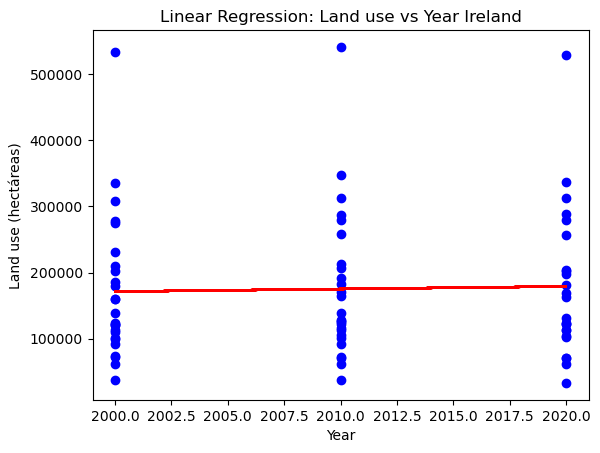

Slope coefficient: 389.0359957850366
Intercept: -606867.7525816644


In [131]:
X = g_iredata[['Year']]
y = g_iredata['A_AAU']  


model = LinearRegression()

model.fit(X, y)

predicciones = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, predicciones, color='red')
plt.title('Linear Regression: Land use vs Year Ireland')
plt.xlabel('Year')
plt.ylabel('Land use (hectáreas)')
plt.show()

print('Slope coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

In [132]:
X = g_iredata.drop(['A_AAU', 'County'], axis=1) 
y = g_iredata['A_AAU']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f_values, p_values = f_regression(X_train, y_train)

features_selected = X_train.columns[p_values < 0.05]
X_train_selected = X_train[features_selected]
X_test_selected = X_test[features_selected]
train_model = LinearRegression()
train_model.fit(X_train_selected, y_train)

LinearRegression()

In [133]:
print('Slope coefficient:', train_model.coef_[0])
print('Intercept:', train_model.intercept_)

Slope coefficient: 14.940390206845027
Intercept: -52.452808046888094


In [134]:
y_pred = train_model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [135]:
print("mean Absolute Error:", mae)
print("mean squared error:", mse)
print("R^2 score:", r2)

mean Absolute Error: 765.1712059031597
mean squared error: 1192552.7074064792
R^2 score: 0.9999074508668423


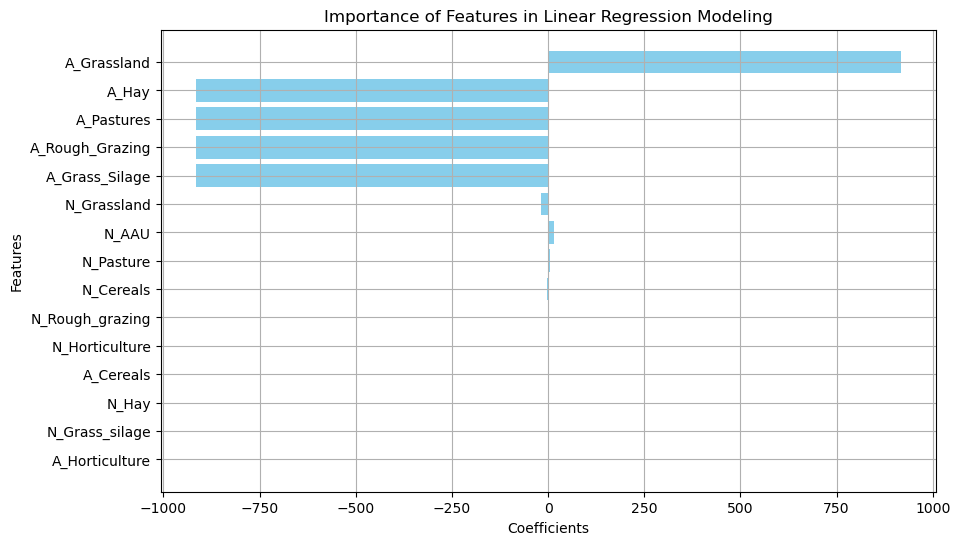

In [136]:
coefficients = train_model.coef_

feature_imp = pd.DataFrame({
    'Features': features_selected,
    'Importance': coefficients
})

feature_imp = feature_imp.reindex(feature_imp.Importance.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp['Features'], feature_imp['Importance'], color='skyblue')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Importance of Features in Linear Regression Modeling')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [137]:
new_IREdf = pd.DataFrame({
    'Year': [2025, 2030, 2035],
    'N_AAU': [2628, 2428, 2528],
    'N_Pasture': [4848, 4448, 4748],
    'N_Hay': [158464, 150464.28, 188464.28],
    'N_Grass_silage': [158464, 150464.28, 188464.28],   
    'N_Horticulture': [158464, 150464.28, 188464.28],
    'N_Cereals': [158464, 150464.28, 188464.28],
    'N_Rough_grazing': [150047, 148047.14, 154047.14],
    'N_Grassland': [3468, 24684, 3368],
    'A_AAU': [2628, 2428, 2528],
    'A_Pastures': [2238, 2138, 3238],
    'A_Hay': [2840, 2440, 2740],
    'A_Grass_Silage': [2238, 2138, 3238],
    'A_Rough_Grazing': [2840, 2440, 2740],
    'A_Horticulture': [2840, 2440, 2740],
    'A_Cereals': [2840, 2440, 2740],
    'A_Grassland': [2840, 2440, 2740]
})

In [138]:
nuevas_predicciones = train_model.predict(new_IREdf[features_selected])

In [139]:
nuevas_predicciones

array([-6440405.21942627, -6285958.28306381, -8177456.75458108])

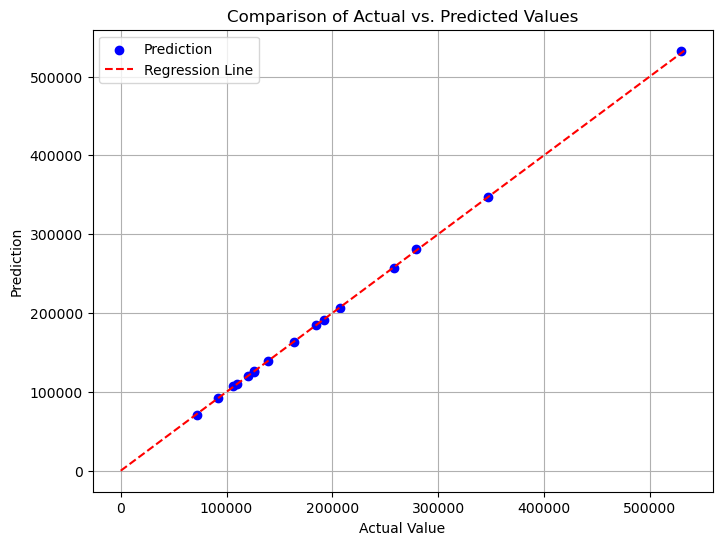

In [140]:
predict = train_model.predict(X_test_selected)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predict, color='blue', label='Prediction')

max_value = max(y_test.max(), predict.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Regression Line')

plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()

plt.grid(True)
plt.show()

## 3. Sentiment Analysis

In [141]:
reddit = praw.Reddit(client_id='t_3PcFNJ4GmlEr8qgCMMCw',
                     client_secret='7D_B69jRJZgkq6s2DLxF8vctD5KrJg',
                     user_agent='nel1925')

In [142]:
def get_comments(post_url):
    submission = reddit.submission(url=post_url)
    comments = []
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        comments.append({
            'author': comment.author,
            'body': comment.body,
            'score': comment.score,
            'created_utc': comment.created_utc
        })
    return comments

In [143]:
post_url = 'https://www.reddit.com/r/ireland/comments/16g9big/what_do_you_think_of_the_current_state_of_the/'

In [144]:
comments_data = get_comments(post_url)

In [145]:
comments_df = pd.DataFrame(comments_data)
comments_df.head()

author                                               body  score  \
0     qwerty_1965  If it's dying it's because you're so badly led...     25   
1  billiehetfield  If you’re expecting most of us here to really ...     22   
2        denbo786  We already depend on other countries for fruit...      6   
3            None  Unsustainable yet trying so hard to pretend to...     19   
4        Eurouser  We need to move towards more sustainable plant...      5   

    created_utc  
0  1.694473e+09  
1  1.694474e+09  
2  1.694476e+09  
3  1.694472e+09  
4  1.694525e+09

In [146]:
comments_df.shape

(62, 4)

### TextBlob

In [147]:
threshold = 0
comments_df['textBlob_score'] = comments_df['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [148]:
comments_df['predicted_label'] = comments_df['textBlob_score'].apply(lambda x: 1 if x > threshold else 0)

In [149]:
comments_df.head()

author                                               body  score  \
0     qwerty_1965  If it's dying it's because you're so badly led...     25   
1  billiehetfield  If you’re expecting most of us here to really ...     22   
2        denbo786  We already depend on other countries for fruit...      6   
3            None  Unsustainable yet trying so hard to pretend to...     19   
4        Eurouser  We need to move towards more sustainable plant...      5   

    created_utc  textBlob_score  predicted_label  
0  1.694473e+09       -0.272500                0  
1  1.694474e+09        0.150000                1  
2  1.694476e+09        0.107857                1  
3  1.694472e+09        0.052083                1  
4  1.694525e+09        0.204286                1

In [150]:
comments_df['predicted_label'].unique()

array([0, 1], dtype=int64)

In [151]:
vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 10)
x = vectorizer.fit_transform(comments_df['body'])
y = comments_df['predicted_label']

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0) 

In [155]:
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

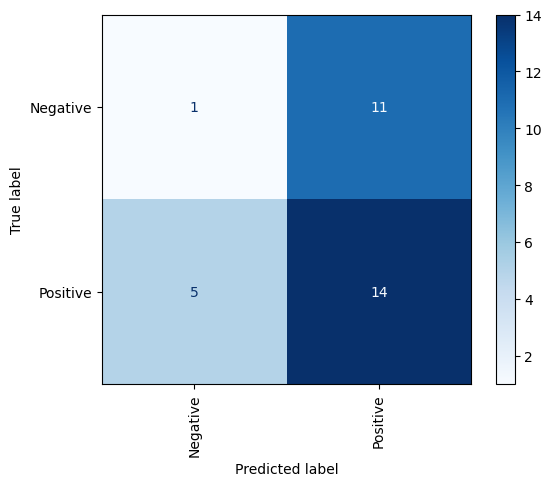

In [156]:
cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative','Positive'],
                   cmap='Blues', xticks_rotation='vertical')

In [157]:
y_pred = model.predict(x_test)

In [158]:
# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.56      0.74      0.64        19

    accuracy                           0.48        31
   macro avg       0.36      0.41      0.37        31
weighted avg       0.41      0.48      0.43        31



### Vaher 

In [159]:
analyzer = SentimentIntensityAnalyzer()

In [160]:
def get_sentiment_score(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']

In [161]:
comments_df['vaher_score'] = comments_df['body'].apply(get_sentiment_score)

In [162]:
comments_df['label'] = 0
comments_df.loc[comments_df['vaher_score'] > 0, 'label'] = 1
comments_df.loc[comments_df['vaher_score'] <= 0, 'label'] = -1
comments_df.head()

author                                               body  score  \
0     qwerty_1965  If it's dying it's because you're so badly led...     25   
1  billiehetfield  If you’re expecting most of us here to really ...     22   
2        denbo786  We already depend on other countries for fruit...      6   
3            None  Unsustainable yet trying so hard to pretend to...     19   
4        Eurouser  We need to move towards more sustainable plant...      5   

    created_utc  textBlob_score  predicted_label  vaher_score  label  
0  1.694473e+09       -0.272500                0      -0.8151     -1  
1  1.694474e+09        0.150000                1       0.0000     -1  
2  1.694476e+09        0.107857                1       0.8049      1  
3  1.694472e+09        0.052083                1      -0.3248     -1  
4  1.694525e+09        0.204286                1      -0.2740     -1

In [163]:
comments_df.shape

(62, 8)

In [164]:
vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 10)
x = vectorizer.fit_transform(comments_df['body'])
y = comments_df['label']

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0) 

In [166]:


model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

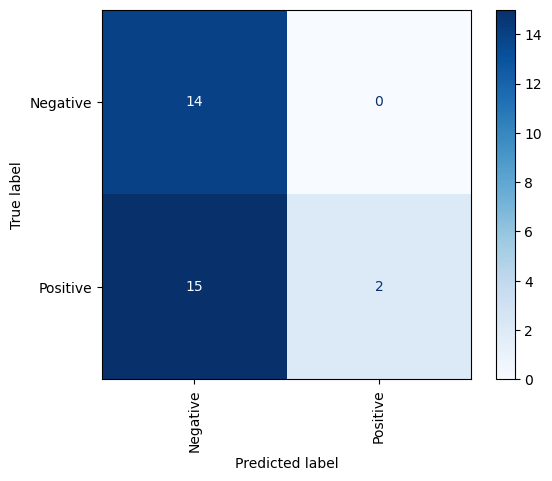

In [167]:
%matplotlib inline
cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative','Positive'],
                   cmap='Blues', xticks_rotation='vertical')

In [168]:
y_pred = model.predict(x_test)

In [169]:
# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

          -1       0.48      1.00      0.65        14
           1       1.00      0.12      0.21        17

    accuracy                           0.52        31
   macro avg       0.74      0.56      0.43        31
weighted avg       0.77      0.52      0.41        31



In [170]:
# Usar %whos para listar todas las variables y su uso de memoria
%whos

# Usar %%time para medir el tiempo de ejecución de una celda
%%time
# Código aquí



Variable                         Type                          Data/Info
------------------------------------------------------------------------
AAU_range                        tuple                         n=2
CountVectorizer                  type                          <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
GridSearchCV                     ABCMeta                       <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
LinearRegression                 ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
LogisticRegression               type                          <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
NUAA_range                       tuple                         n=2
OneHotEncoder                    type                          <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
RandomForestRegressor            ABCMeta                       <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
Region

yc_groupdf                       DataFrame                         Year     County     A<...>\n\n[76 rows x 3 columns]
year                             int64                         2020
year_counts                      Series                        Year\n2000    12\n2010   <...>Name: count, dtype: int64
year_data                        Series                        29    -29258.63\n32    23<...>se_Change, dtype: float64
year_percentages                 Series                        Year\n2000    33.333333\n<...>me: count, dtype: float64
years_ire                        ndarray                       3: 3 elems, type `int64`, 24 bytes
years_nl                         ndarray                       3: 3 elems, type `int64`, 24 bytes
yr_groupdf                       DataFrame                         Year Regions      A_U<...>  2020    PV31  193729.84


UsageError: Line magic function `%%time` not found.
